In [1]:
library(tidyverse)
library(leaps)
library(dplyr)
library(tidyverse)
library(arrow)
library(ggplot2)
library(ggcorrplot)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:
data <- read_parquet("train.parquet")

# Explanatory Variable Exploration

In [3]:
str(data)

'data.frame':	1338 obs. of  74 variables:
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 

In [4]:
fm <- lm(data$SalePrice ~., data)

# Best Model without Interaction

In [5]:
finalModel <- step(fm)

Start:  AIC=27092.6
data$SalePrice ~ MSSubClass + MSZoning + LotArea + Street + LotShape + 
    LandContour + Utilities + LotConfig + LandSlope + Neighborhood + 
    Condition1 + Condition2 + BldgType + HouseStyle + OverallQual + 
    OverallCond + YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + 
    Exterior1st + Exterior2nd + MasVnrType + MasVnrArea + ExterQual + 
    ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + 
    BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + BsmtFinSF2 + BsmtUnfSF + 
    TotalBsmtSF + Heating + HeatingQC + CentralAir + Electrical + 
    X1stFlrSF + X2ndFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + 
    BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + 
    KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + GarageType + 
    GarageYrBlt + GarageFinish + GarageCars + GarageArea + GarageQual + 
    GarageCond + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + 
    X3SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold 

# Exploration of Most Significant Predictors

In [6]:
reg <- lm(formula = data$SalePrice ~ MSSubClass + MSZoning + LotArea + 
    Street + LandContour + Utilities + LotConfig + LandSlope + 
    Neighborhood + Condition1 + Condition2 + OverallQual + OverallCond + 
    YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + 
    MasVnrType + MasVnrArea + ExterQual + BsmtQual + BsmtExposure + 
    BsmtUnfSF + BsmtFinSF1 + BsmtFinSF2 + X1stFlrSF + X2ndFlrSF + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + GarageCars + GarageArea + GarageQual + 
    GarageCond + WoodDeckSF + ScreenPorch + PoolArea + MoSold + 
    SaleType, data = data)
summary(reg)


Call:
lm(formula = data$SalePrice ~ MSSubClass + MSZoning + LotArea + 
    Street + LandContour + Utilities + LotConfig + LandSlope + 
    Neighborhood + Condition1 + Condition2 + OverallQual + OverallCond + 
    YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + 
    MasVnrType + MasVnrArea + ExterQual + BsmtQual + BsmtExposure + 
    BsmtUnfSF + BsmtFinSF1 + BsmtFinSF2 + X1stFlrSF + X2ndFlrSF + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + GarageCars + GarageArea + GarageQual + 
    GarageCond + WoodDeckSF + ScreenPorch + PoolArea + MoSold + 
    SaleType, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-182138   -9170       0   10056  182138 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.633e+06  1.677e+05  -9.736  < 2e-16 ***
MSSubClass          -1.568e+02  2.517e+01  -6.231 6.40e-10 ***
MSZoningFV           4.366e+04  1.239e+04   3.524 0.000441 **

In [7]:
AIC(reg)

[1] 30806.53

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Removed 4 rows containing missing values (geom_point)."

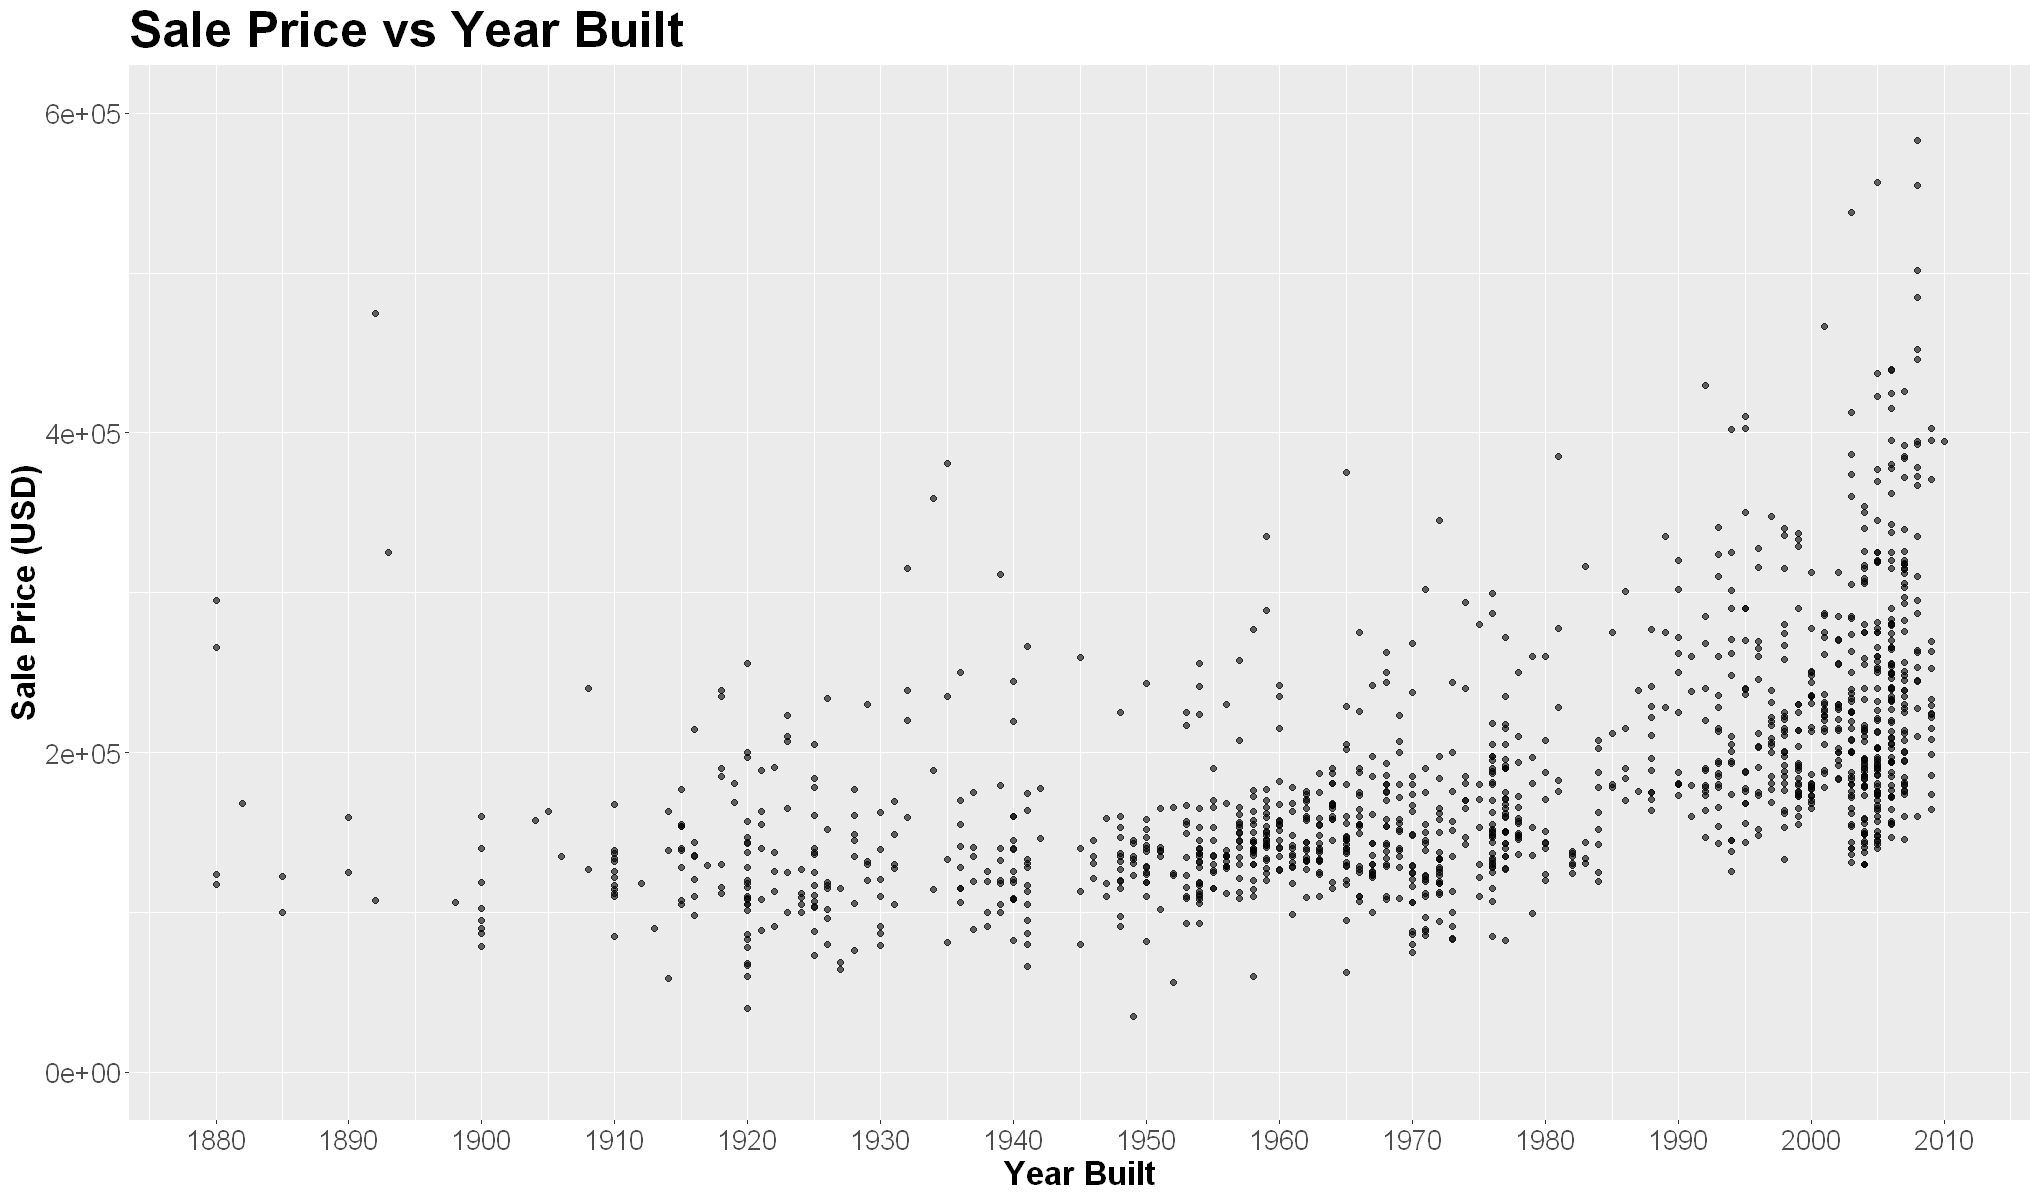

In [8]:
options(repr.plot.width = 17, repr.plot.height = 10)
year_plot <- ggplot(data, aes(x=YearBuilt, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Year Built", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Year Built") +
                xlim(1880, 2010)+
                ylim(0,6e+05) +
                scale_x_continuous(breaks = seq(1880, 2010, by = 10)) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
year_plot

Warning message:
"Removed 33 rows containing missing values (geom_point)."

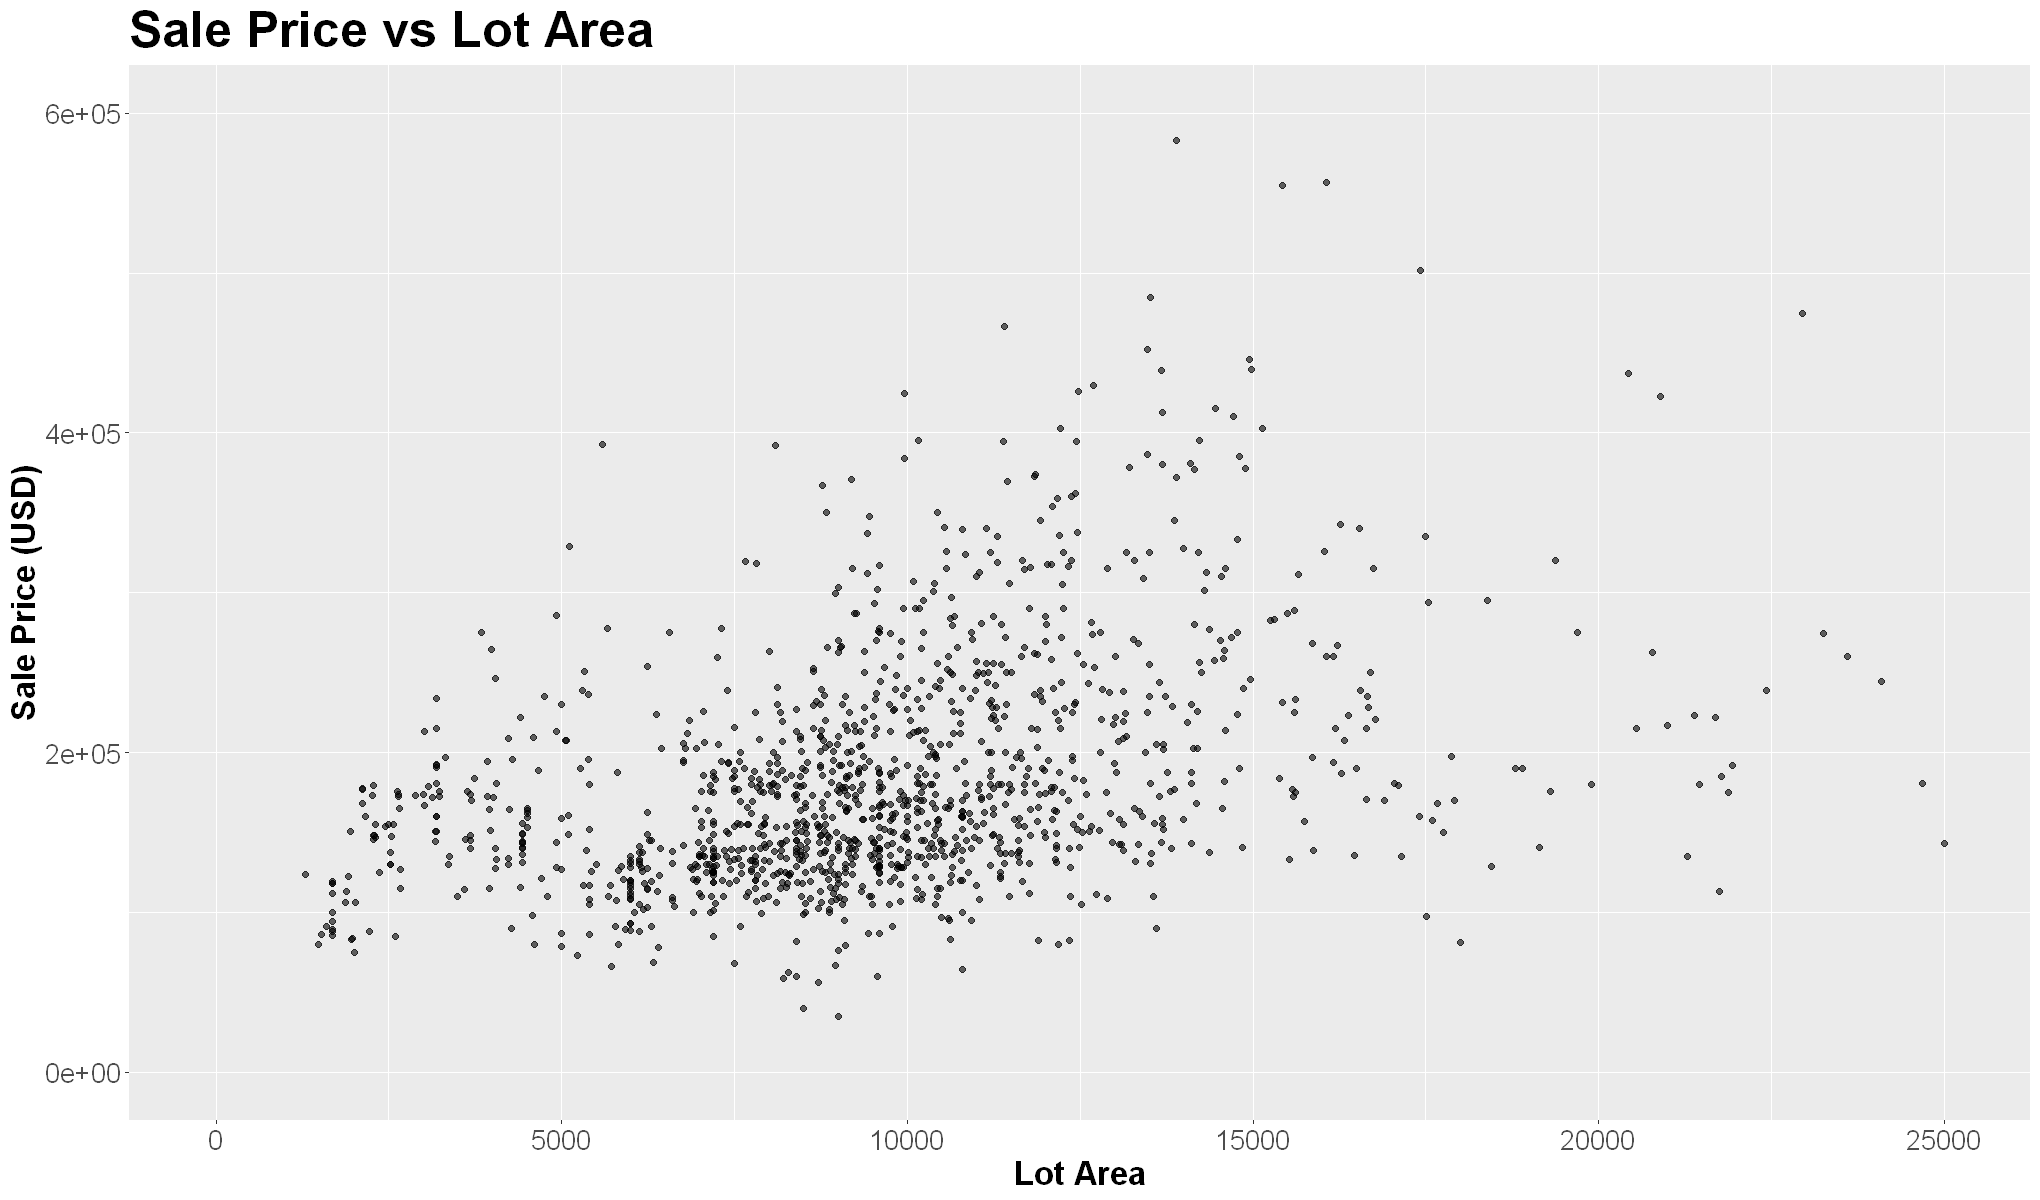

In [9]:
options(repr.plot.width = 17, repr.plot.height = 10)
lotarea_plot <- ggplot(data, aes(x=LotArea, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Lot Area", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Lot Area") +
                xlim(0, 25000)+
                ylim(0,6e+05) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
lotarea_plot

Warning message:
"Removed 7 rows containing missing values (geom_point)."

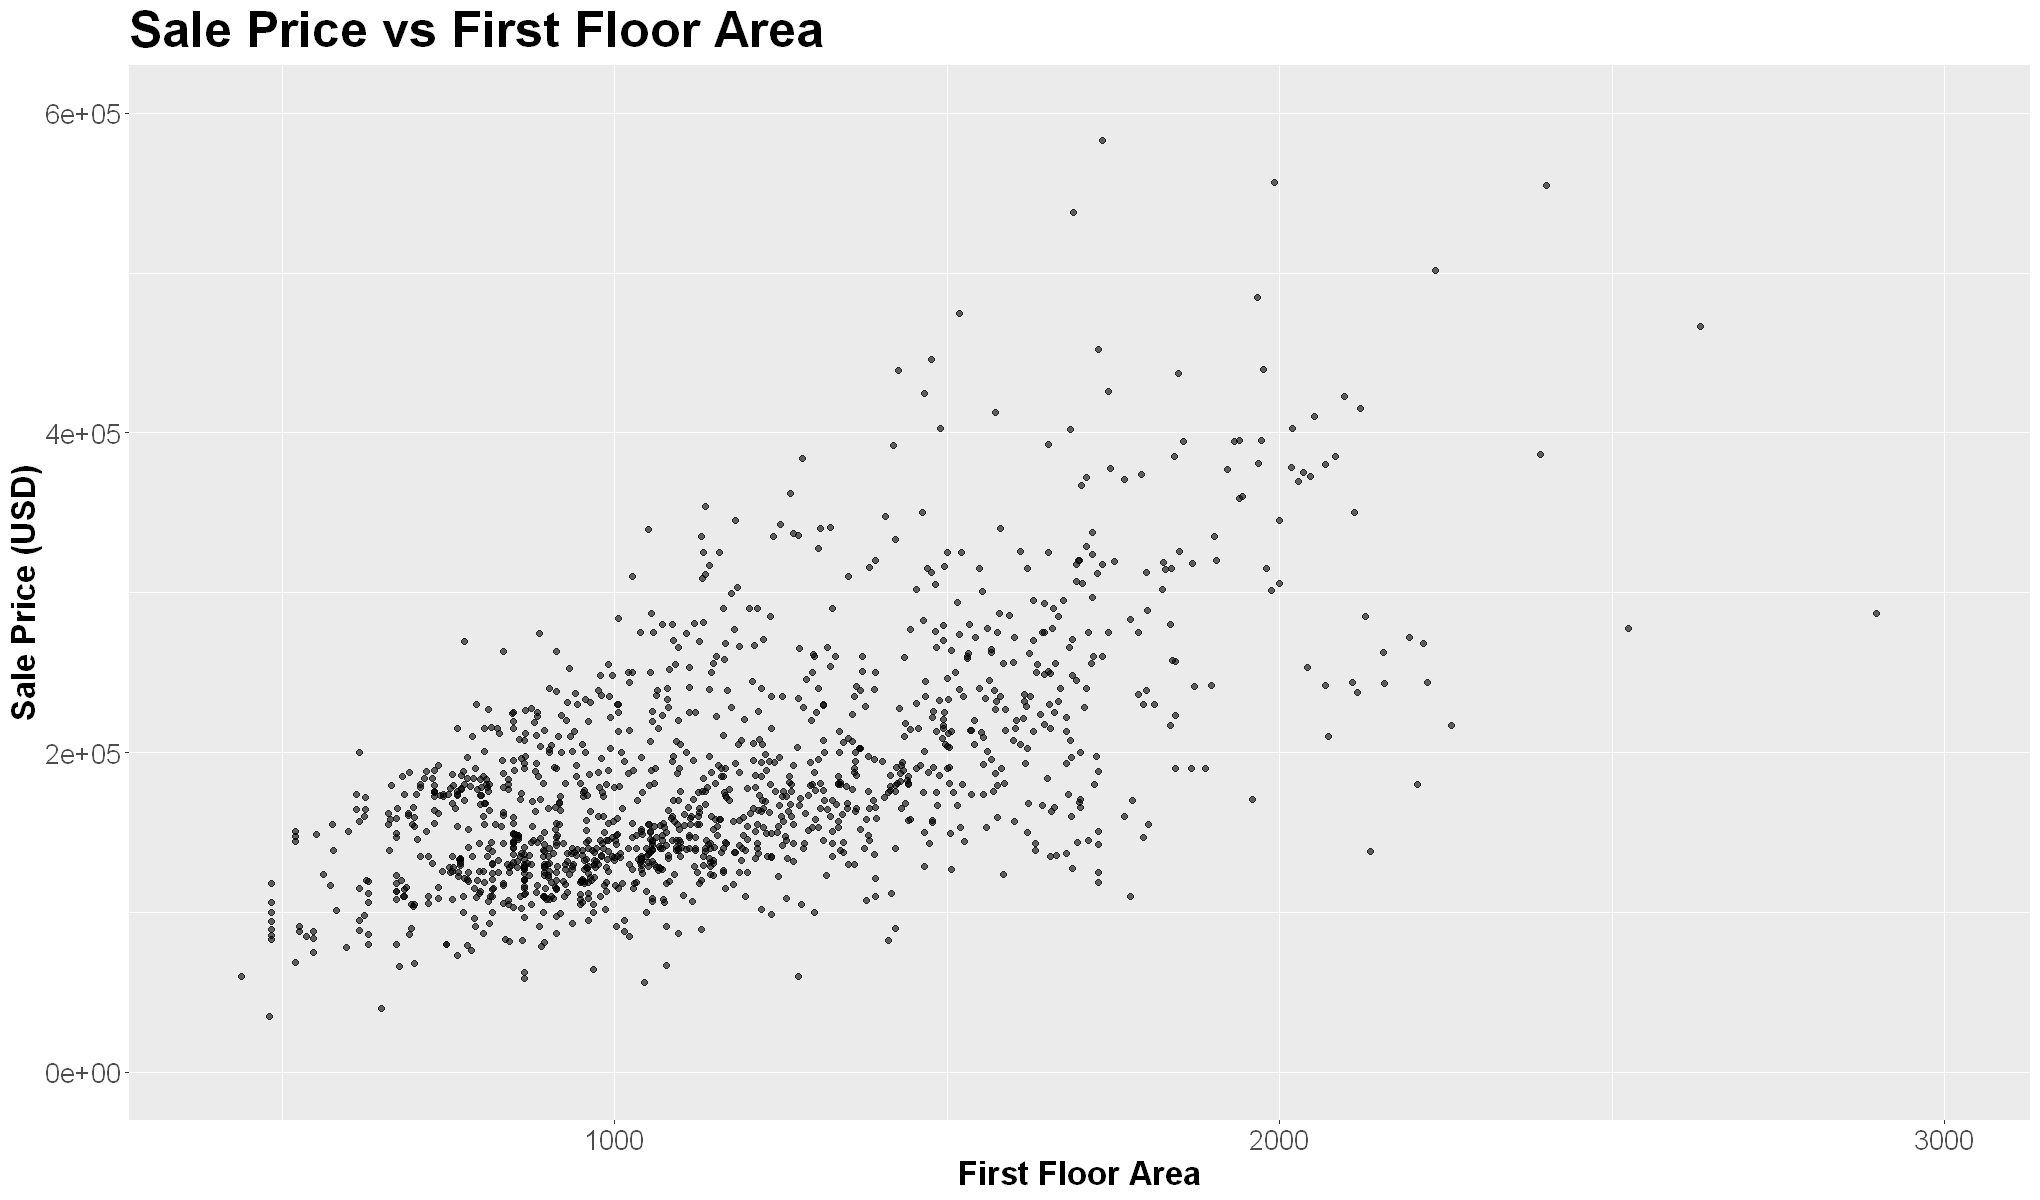

In [10]:
options(repr.plot.width = 17, repr.plot.height = 10)
X1stFlrSF_plot <- ggplot(data, aes(x=X1stFlrSF, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="First Floor Area", y="Sale Price (USD)") +
                ggtitle("Sale Price vs First Floor Area") +
                xlim(400, 3000)+
                ylim(0,6e+05) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
X1stFlrSF_plot

Warning message:
"Removed 754 rows containing missing values (geom_point)."

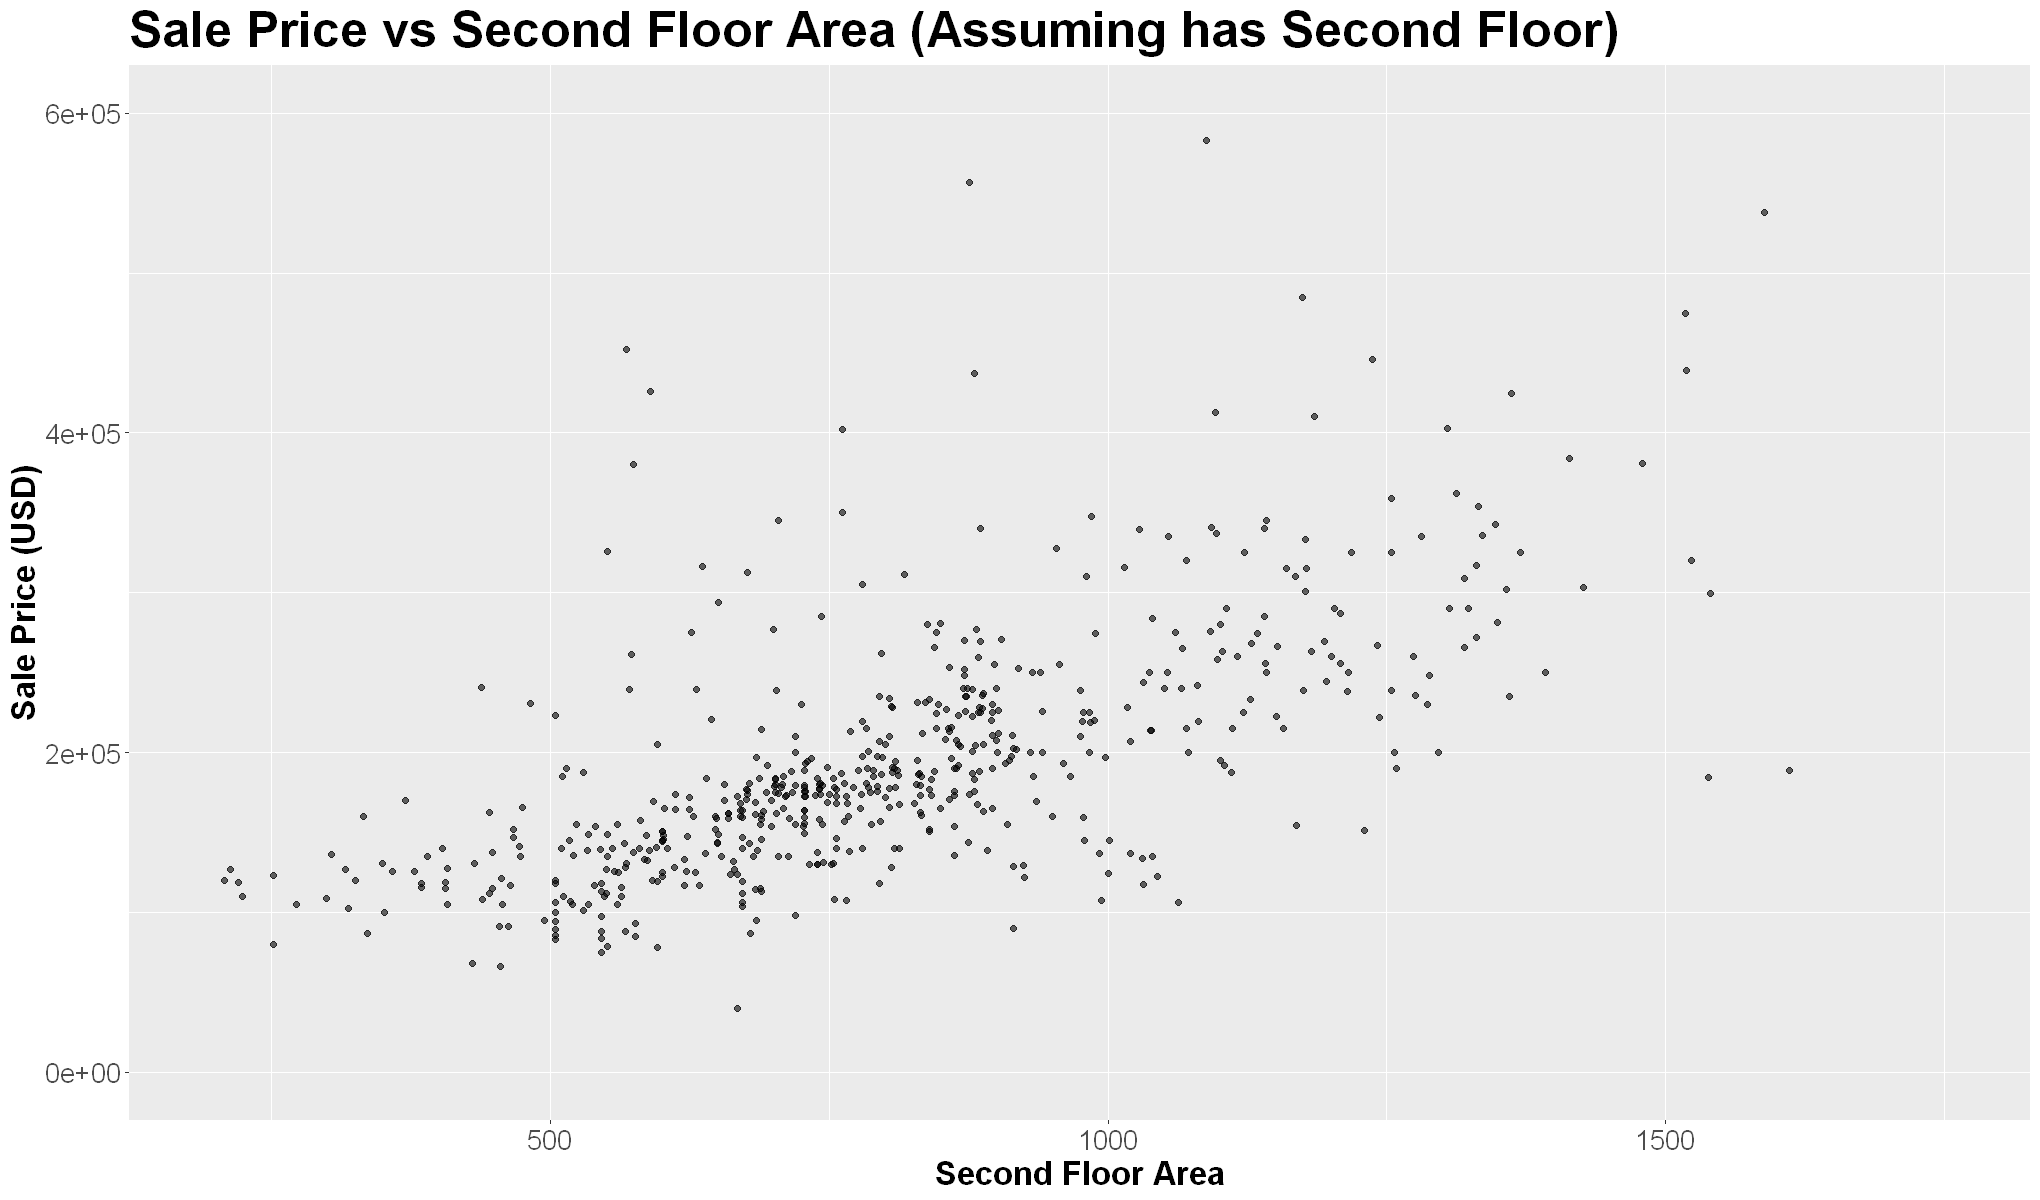

In [11]:
options(repr.plot.width = 17, repr.plot.height = 10)
X2ndFlrSF_plot <- ggplot(data, aes(x=X2ndFlrSF, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Second Floor Area", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Second Floor Area (Assuming has Second Floor)") +
                xlim(200, 1750)+
                ylim(0,6e+05) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
X2ndFlrSF_plot

Warning message:
"Removed 763 rows containing missing values (geom_point)."

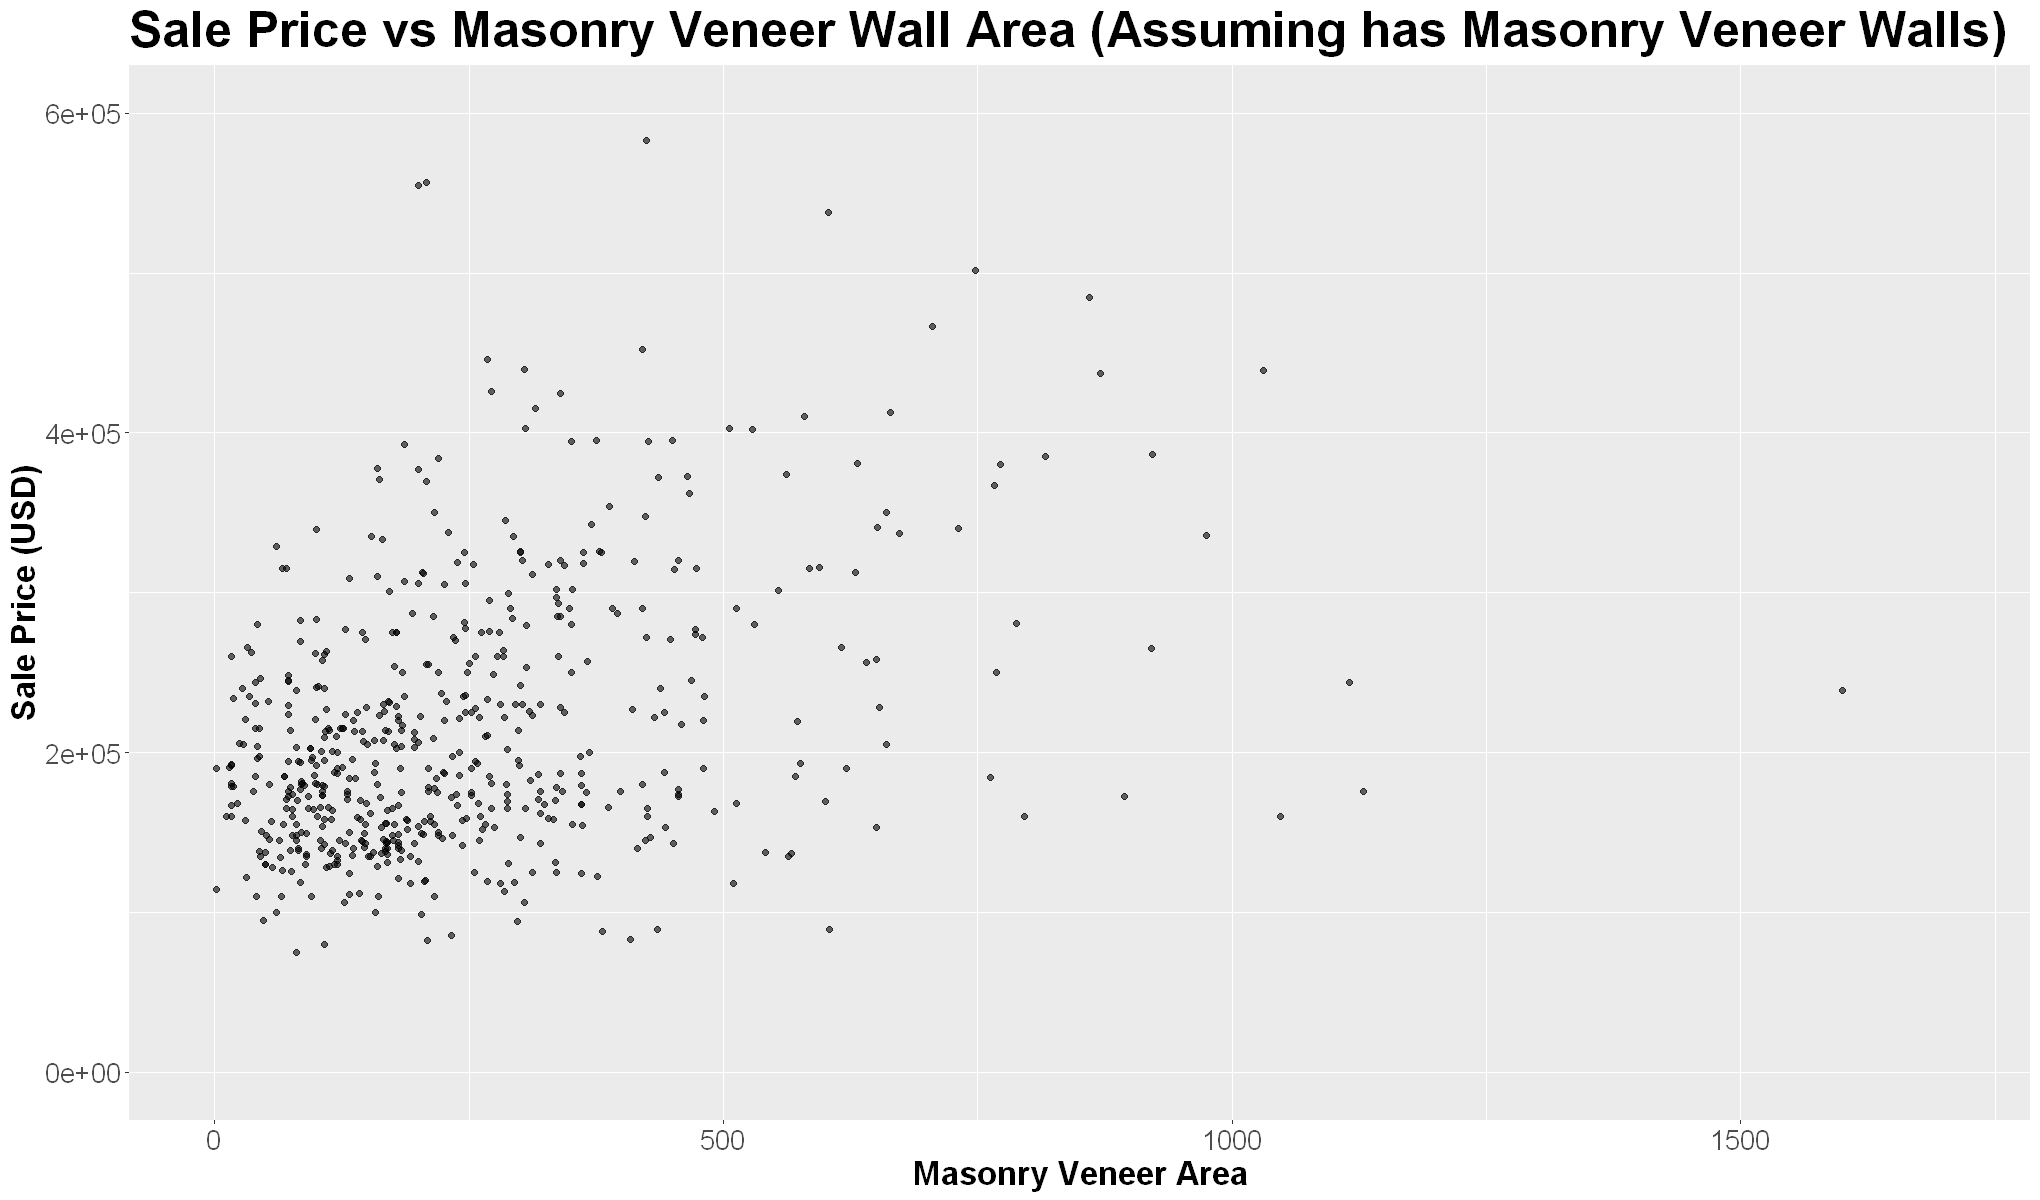

In [12]:
options(repr.plot.width = 17, repr.plot.height = 10)
mvarea_plot <- ggplot(data, aes(x=MasVnrArea, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Masonry Veneer Area", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Masonry Veneer Wall Area (Assuming has Masonry Veneer Walls)") +
                xlim(1, 1700)+
                ylim(0,6e+05) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
mvarea_plot

Warning message:
"Removed 1332 rows containing missing values (geom_point)."

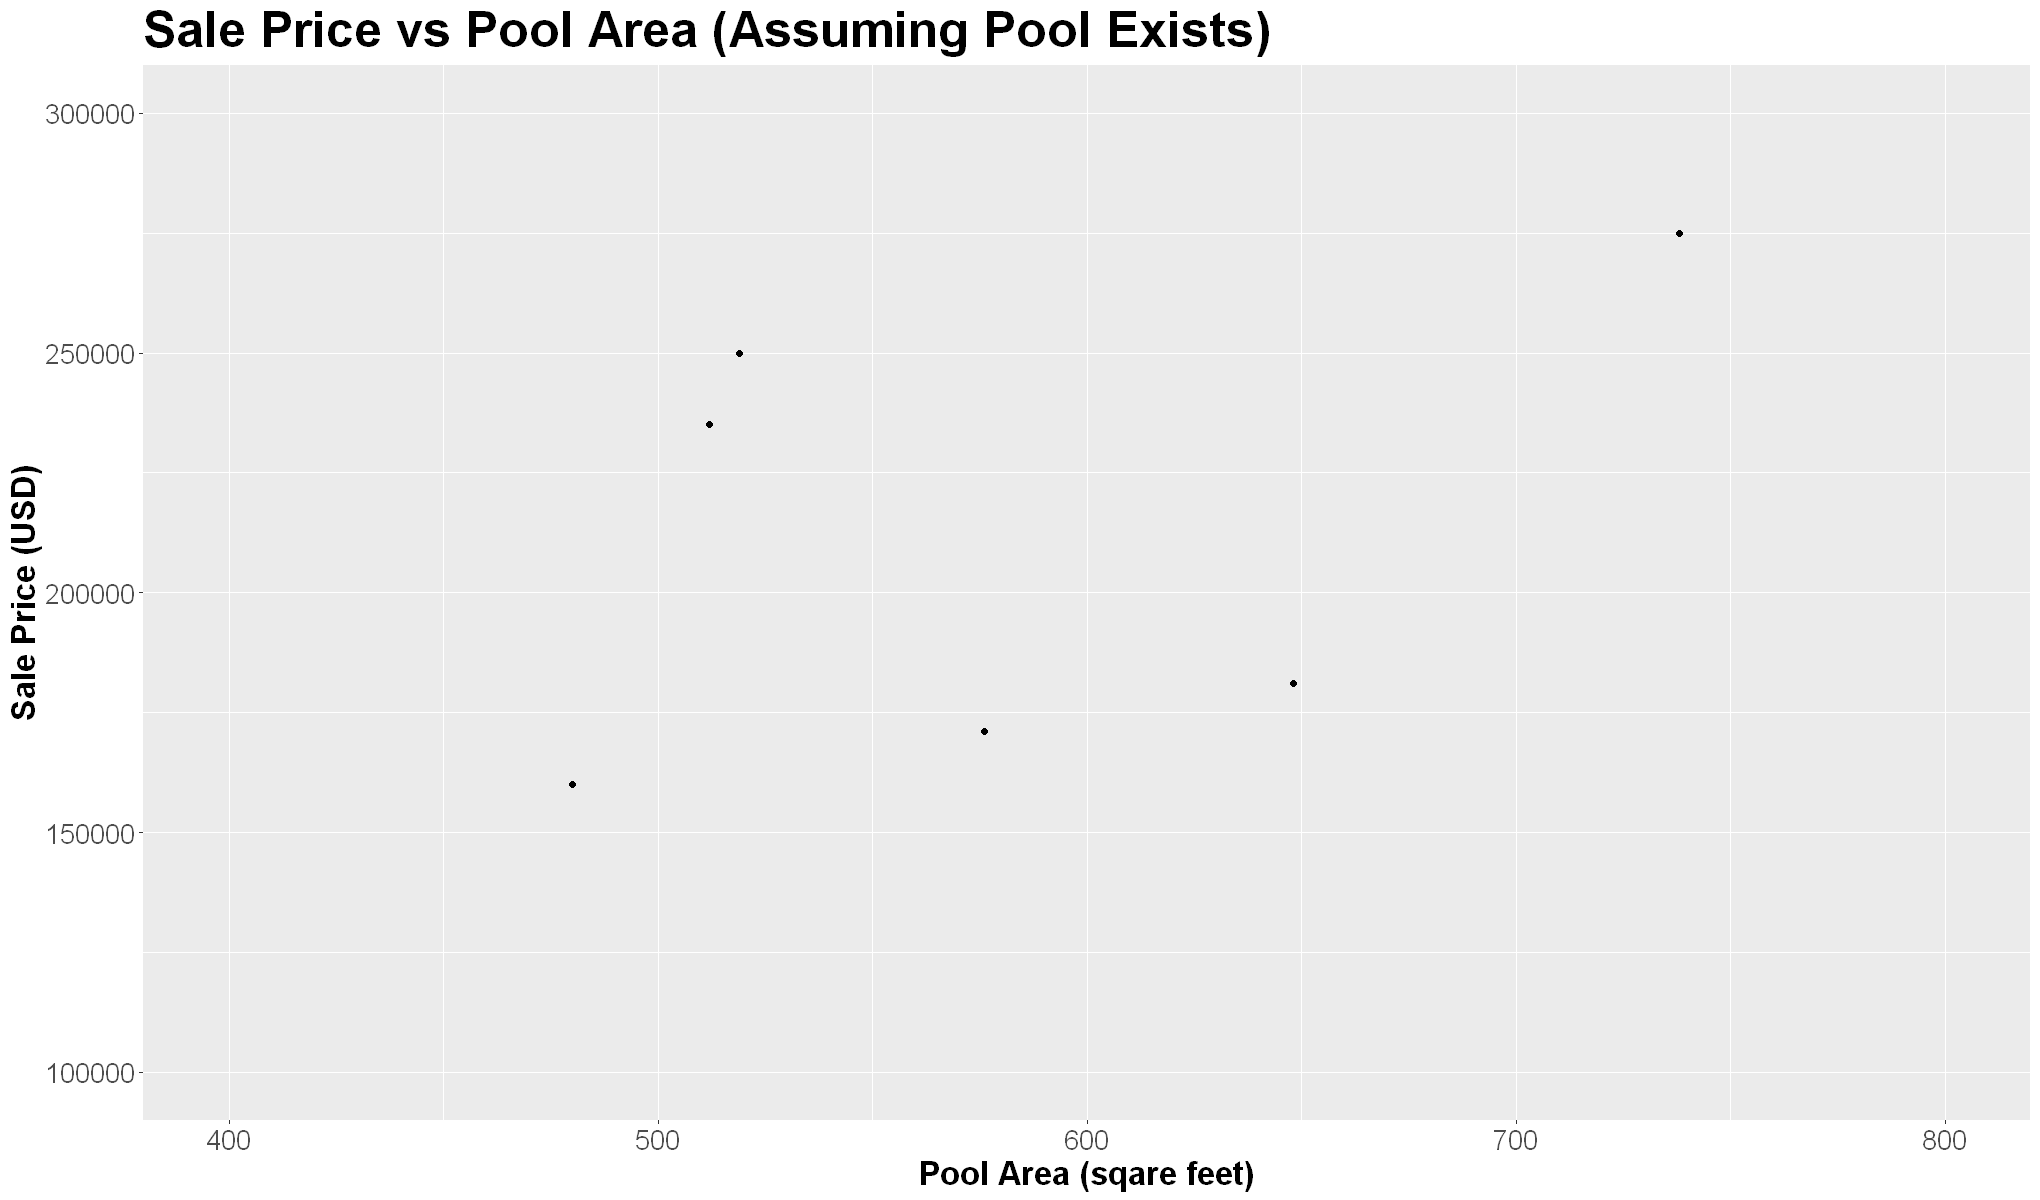

In [13]:
poolarea_plot2 <- ggplot(data, aes(x=PoolArea, y=SalePrice)) +
                geom_point(alpha=1) +
                labs(x="Pool Area (sqare feet)", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Pool Area (Assuming Pool Exists)") +
                xlim(400, 800)+
                ylim(1e+05,3e+05) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
poolarea_plot2

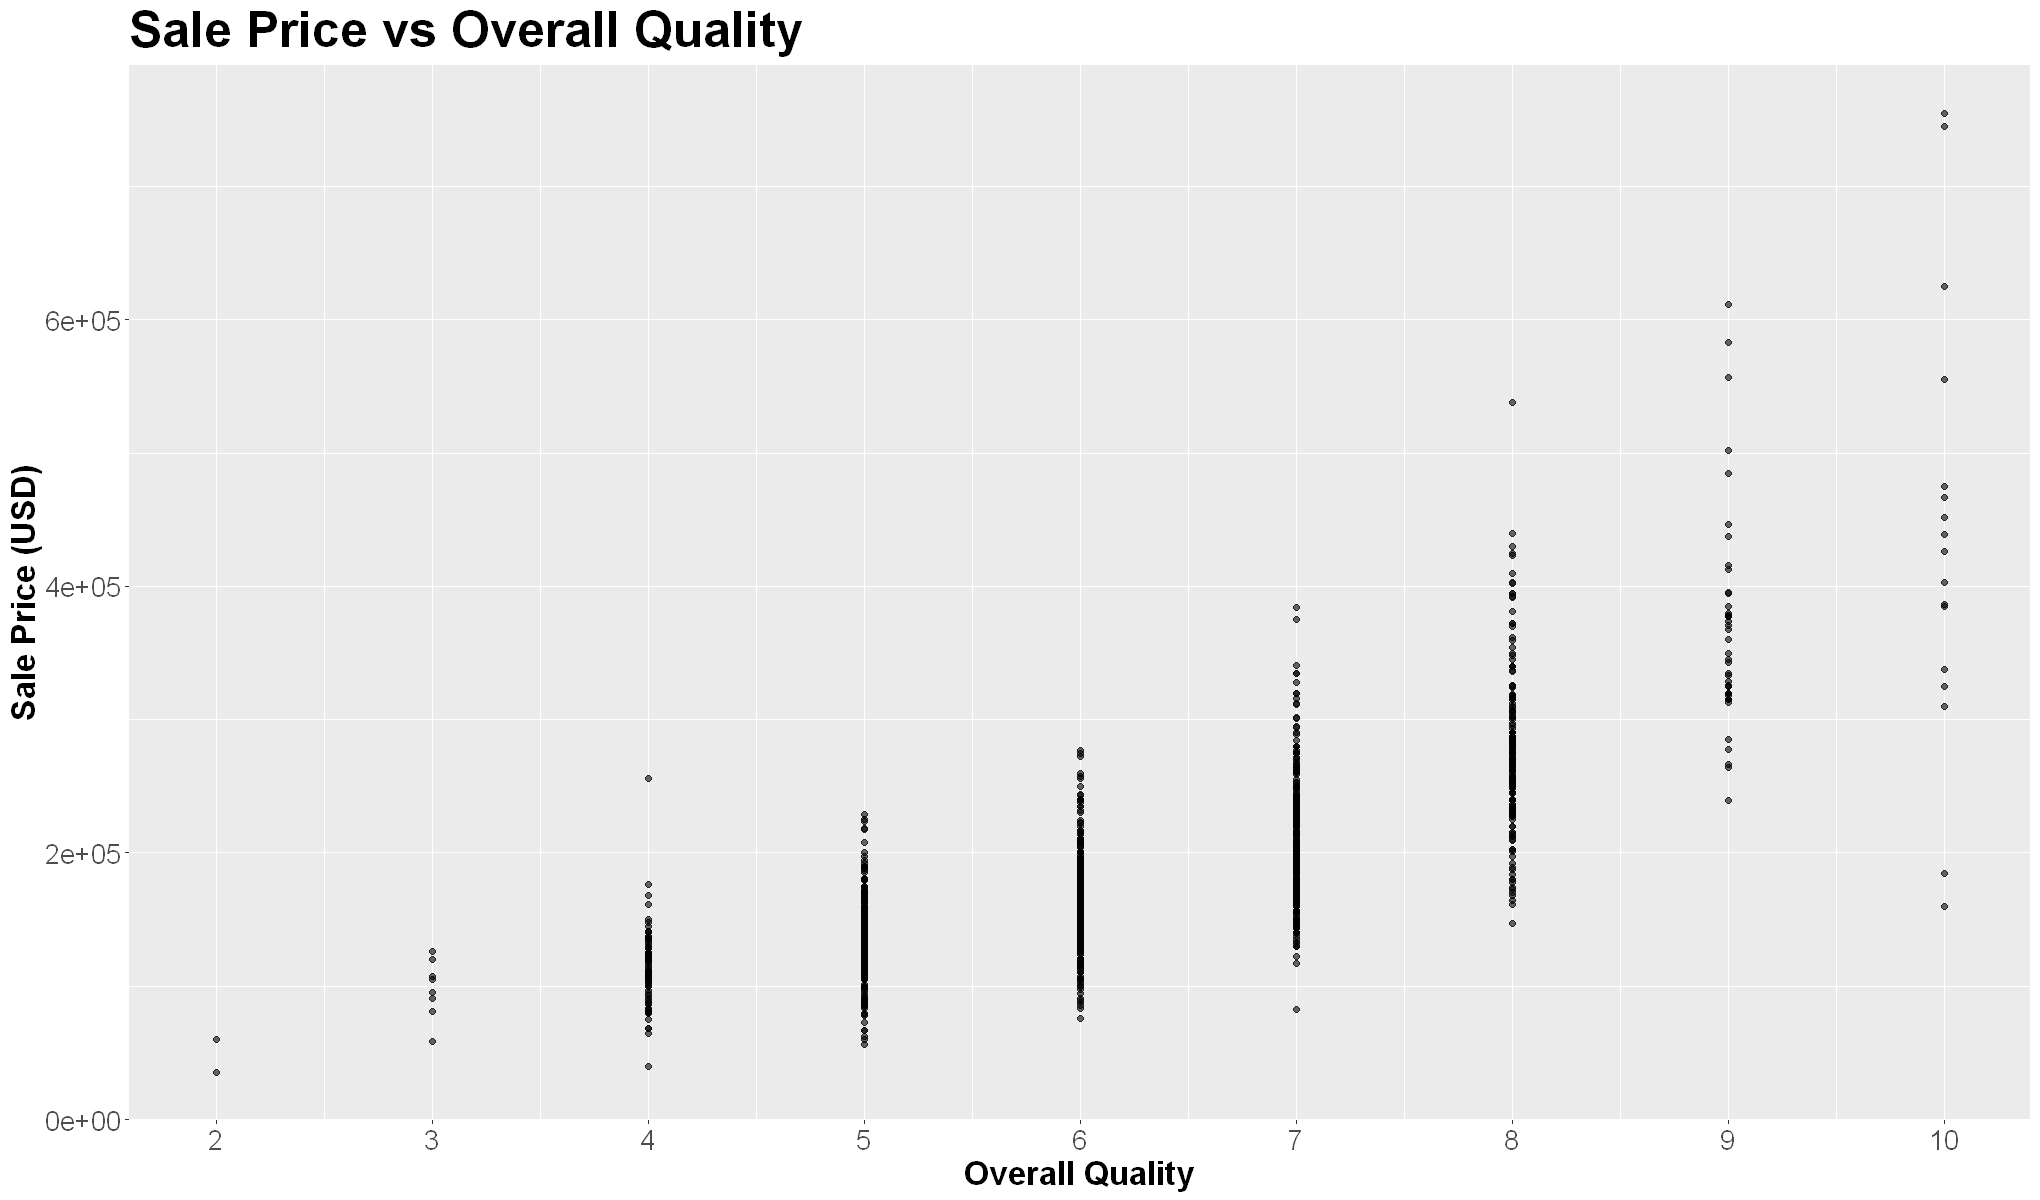

In [14]:
options(repr.plot.width = 17, repr.plot.height = 10)
qual_plot <- ggplot(data, aes(x=OverallQual, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Overall Quality", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Overall Quality") +
                scale_x_continuous(breaks = seq(0, 10, by = 1)) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
qual_plot

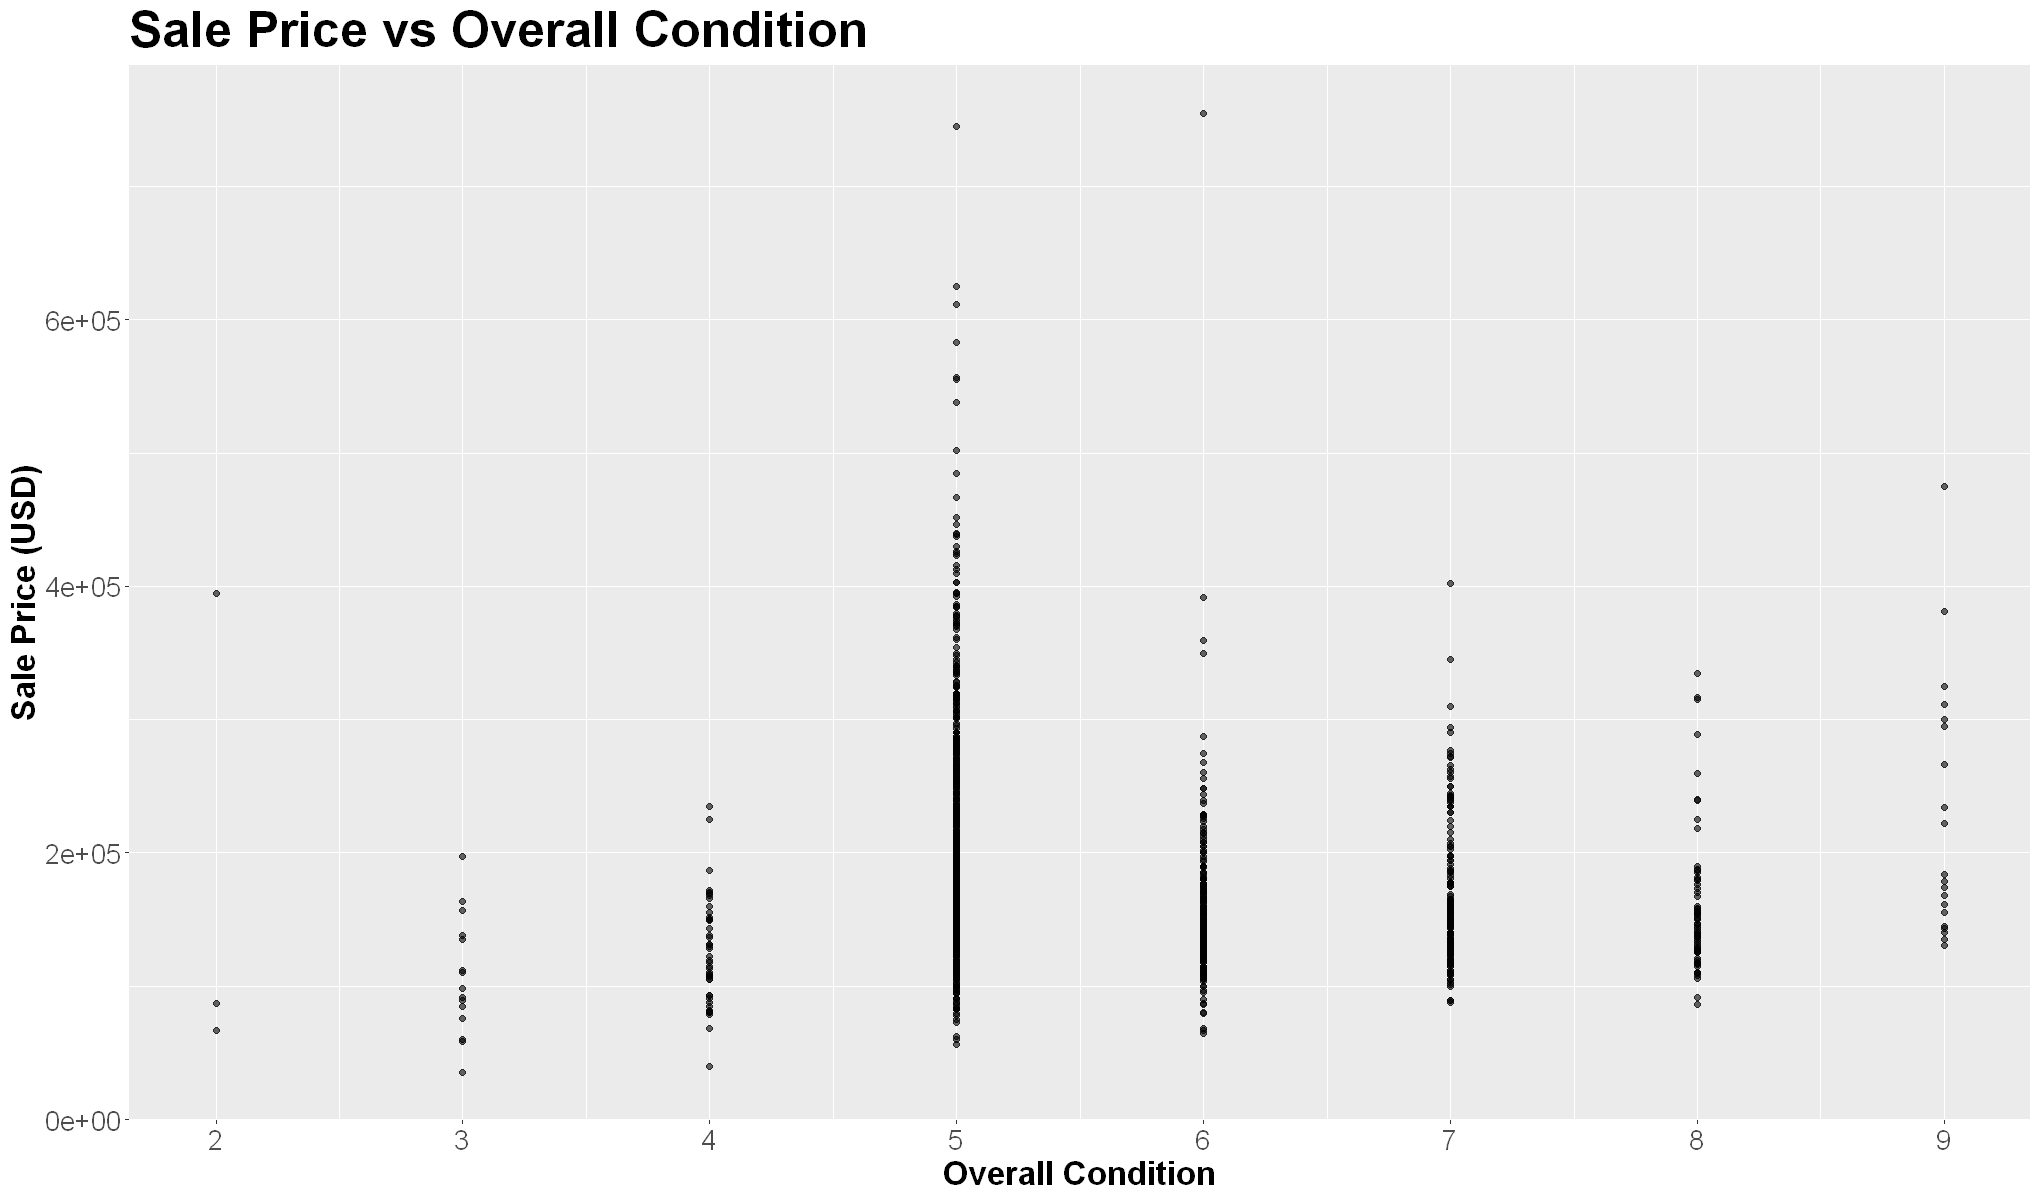

In [15]:
options(repr.plot.width = 17, repr.plot.height = 10)
cond_plot <- ggplot(data, aes(x=OverallCond, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Overall Condition", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Overall Condition") +
                scale_x_continuous(breaks = seq(0, 10, by = 1)) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
cond_plot

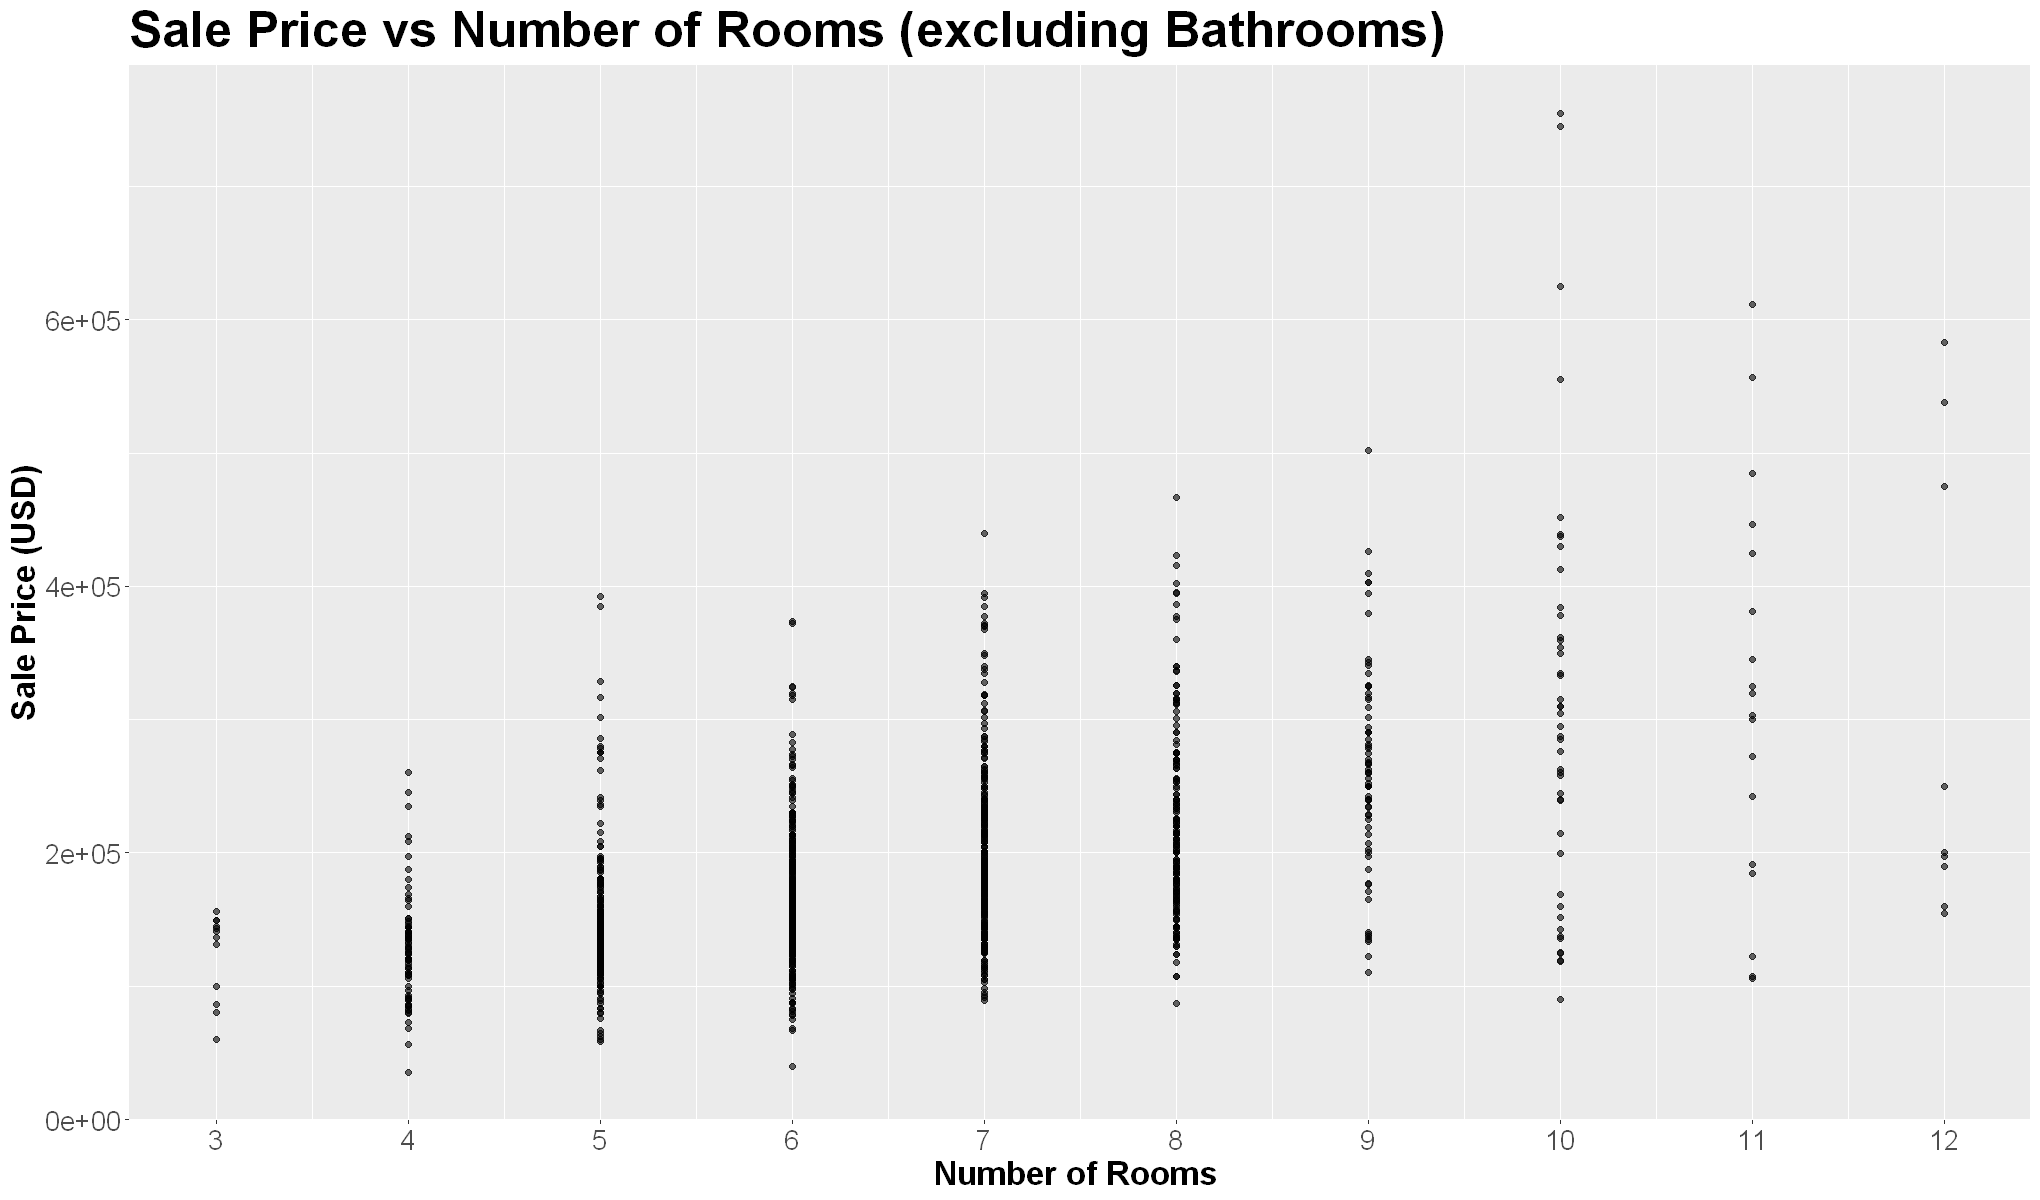

In [16]:
options(repr.plot.width = 17, repr.plot.height = 10)
rs_plot <- ggplot(data, aes(x=TotRmsAbvGrd, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Number of Rooms ", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Number of Rooms (excluding Bathrooms)") +
                scale_x_continuous(breaks = seq(1, 15, by = 1)) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
rs_plot

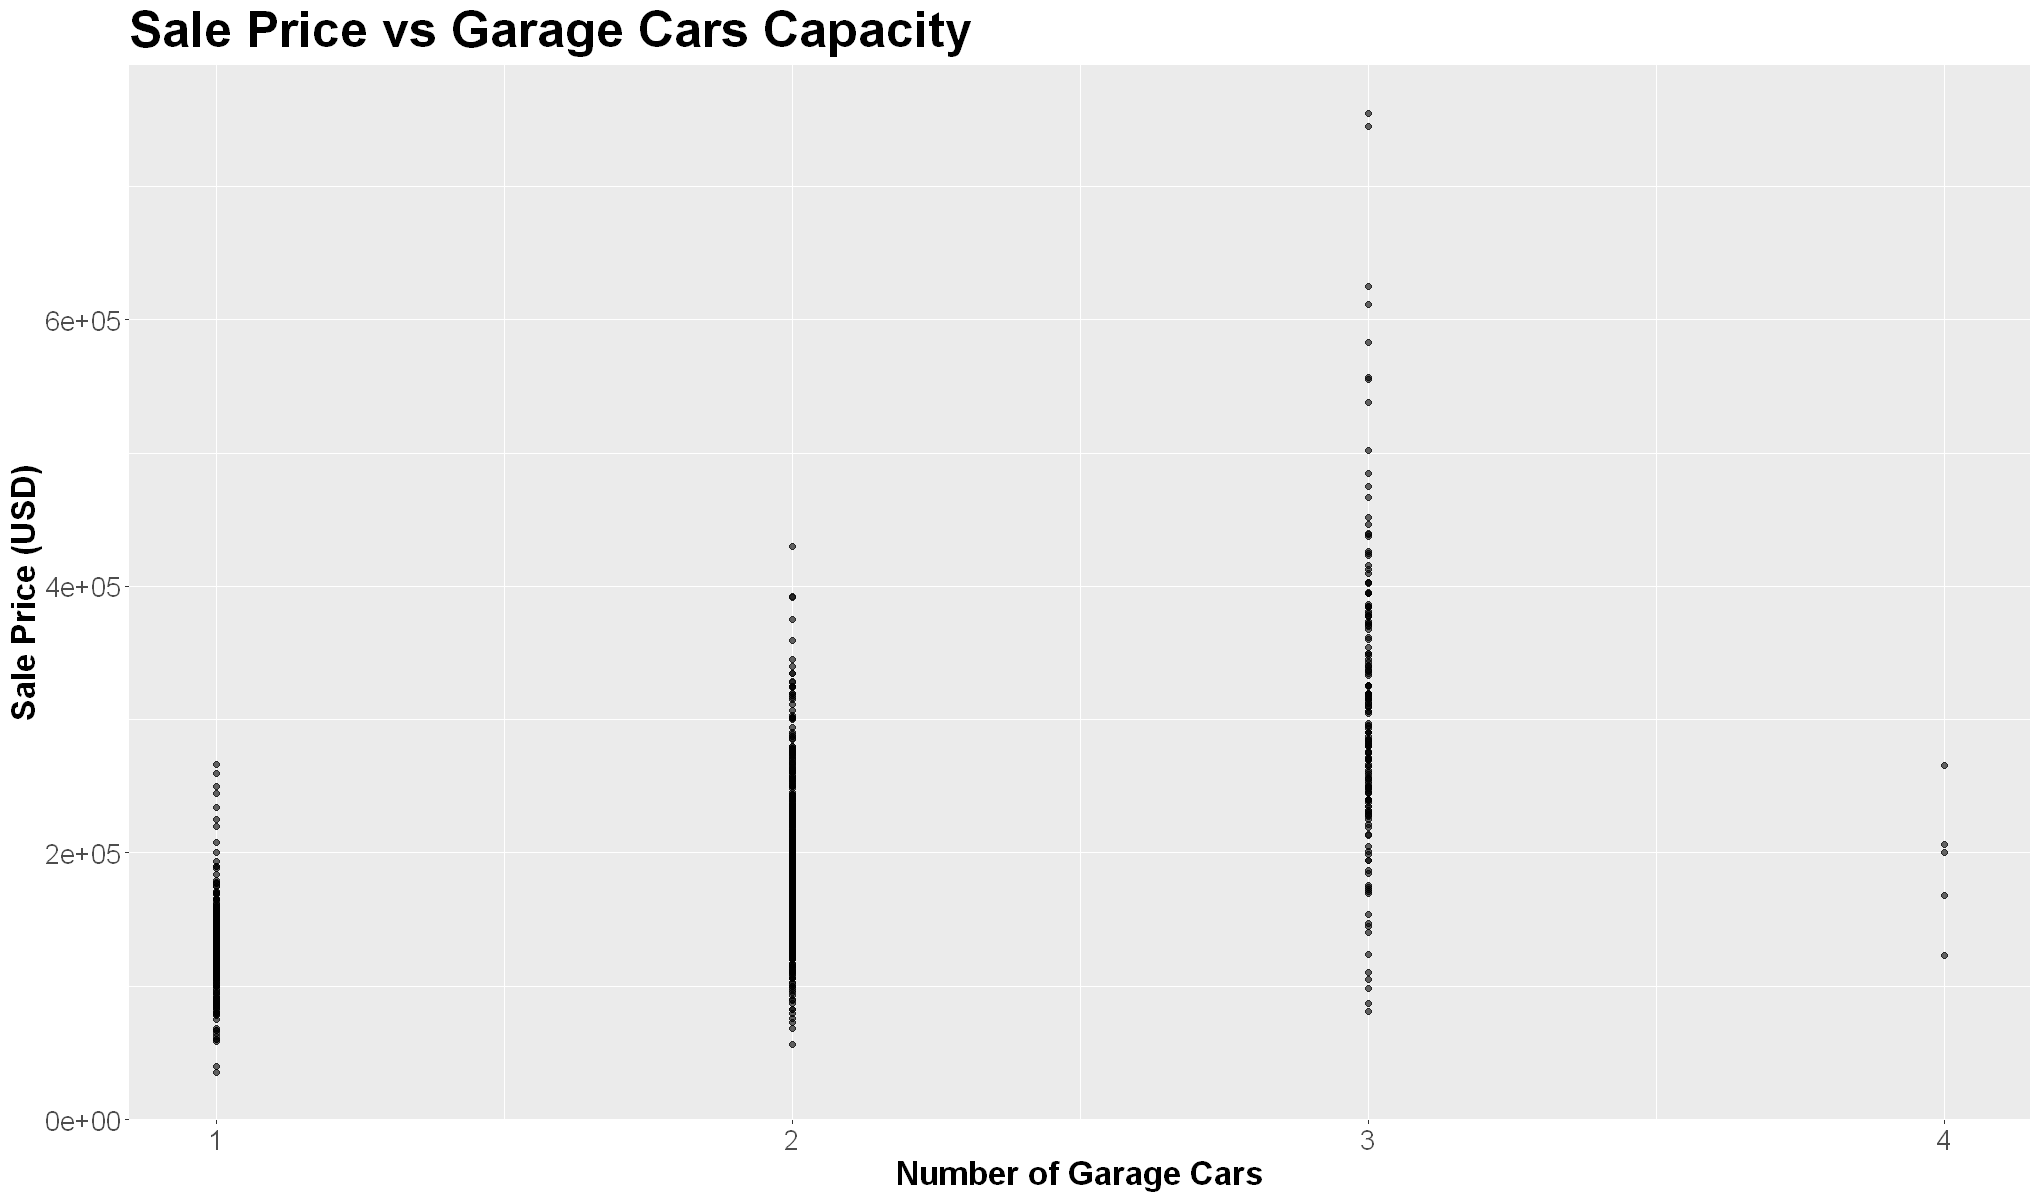

In [17]:
options(repr.plot.width = 17, repr.plot.height = 10)
gc_plot <- ggplot(data, aes(x=GarageCars, y=SalePrice)) +
                geom_point(alpha=0.6) +
                labs(x="Number of Garage Cars", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Garage Cars Capacity") +
                scale_x_continuous(breaks = seq(1, 4, by = 1)) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
gc_plot

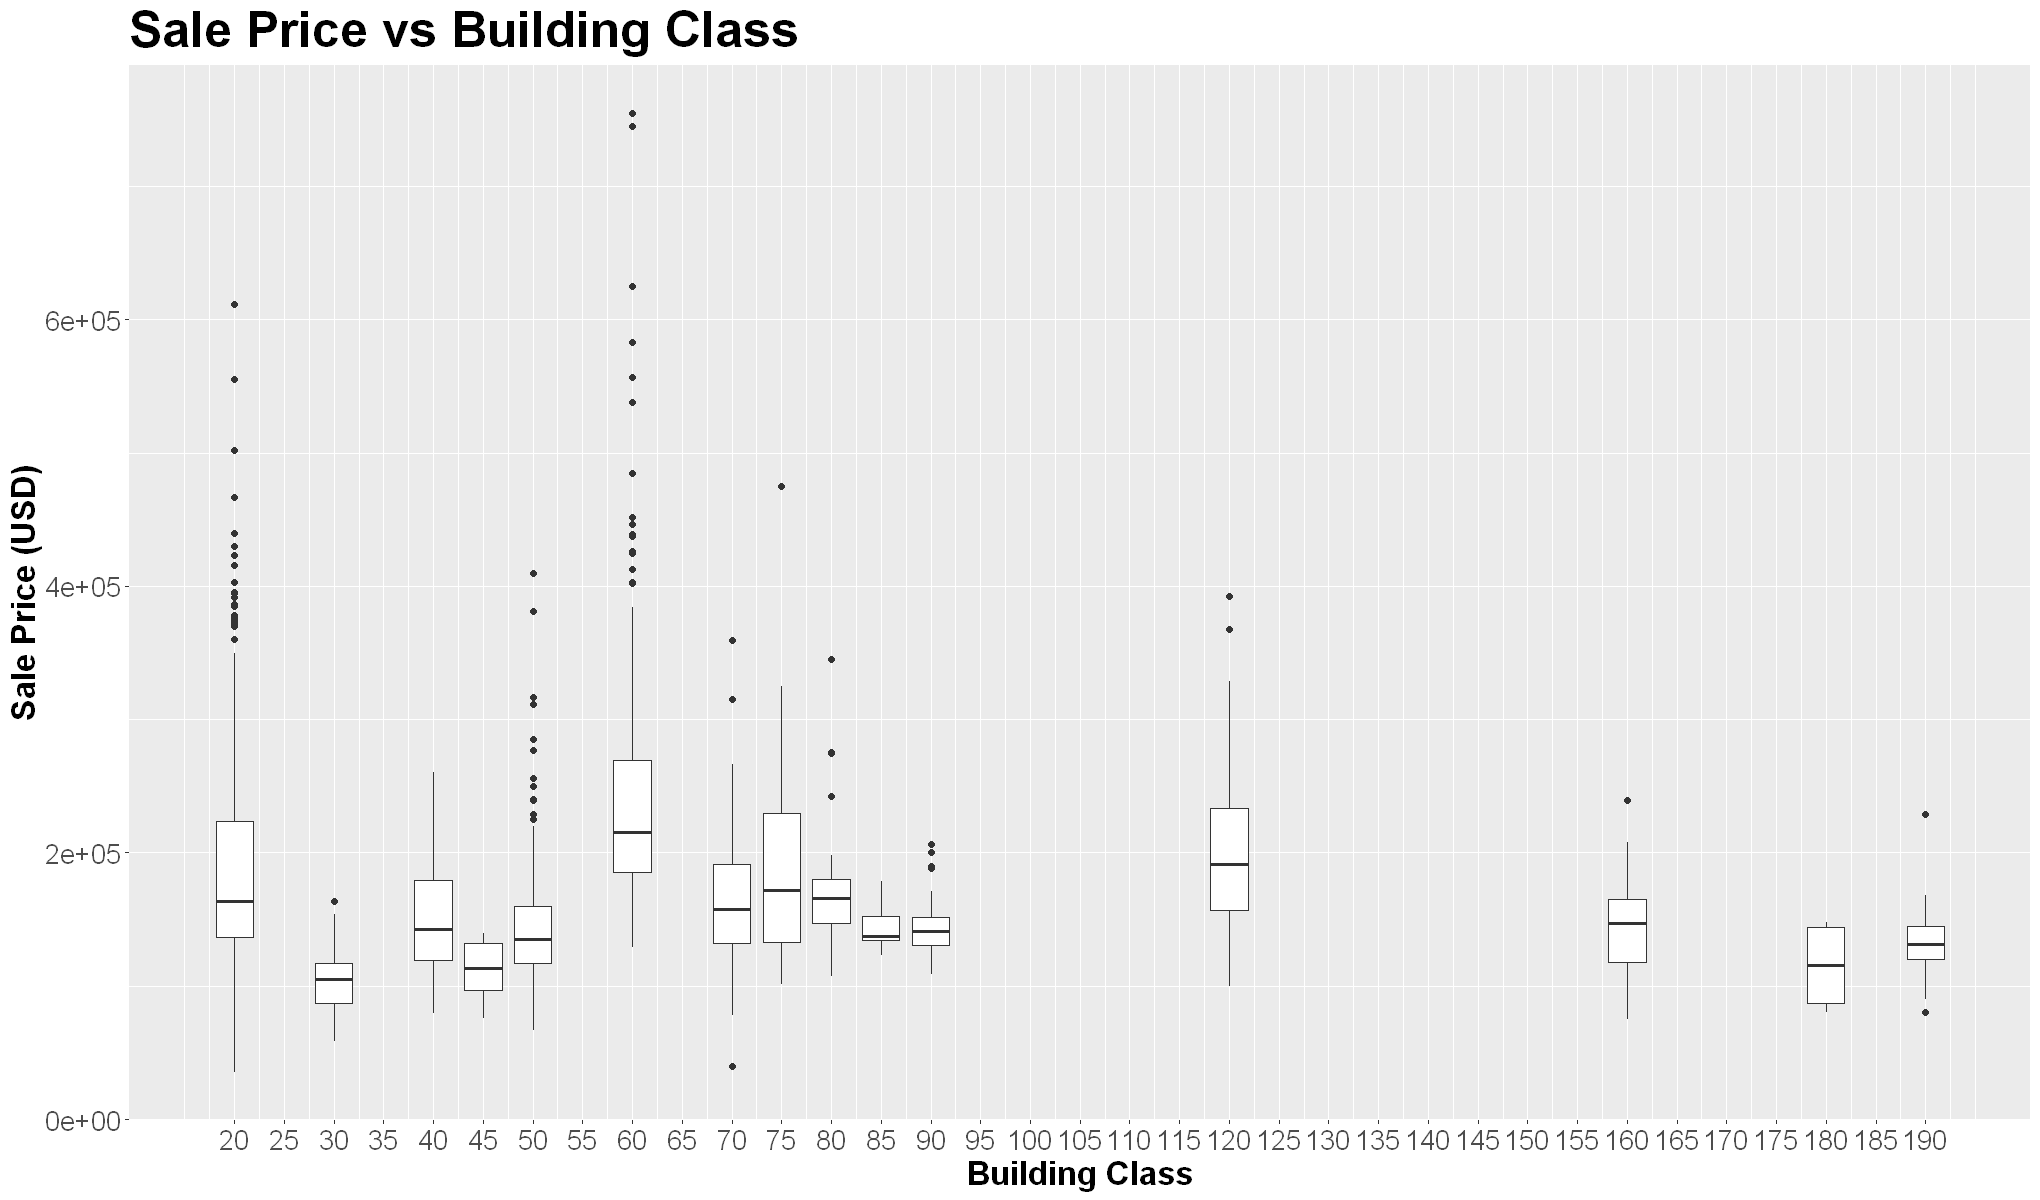

In [18]:
options(repr.plot.width = 17, repr.plot.height = 10)
MSSubClass_plot <- ggplot(data, aes(x=MSSubClass, y=SalePrice, group = MSSubClass)) +
                geom_boxplot() +
                labs(x="Building Class", y="Sale Price (USD)", color="Overall Quality") +
                ggtitle("Sale Price vs Building Class") +
                scale_x_continuous(breaks = seq(20, 190, by = 5)) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
MSSubClass_plot

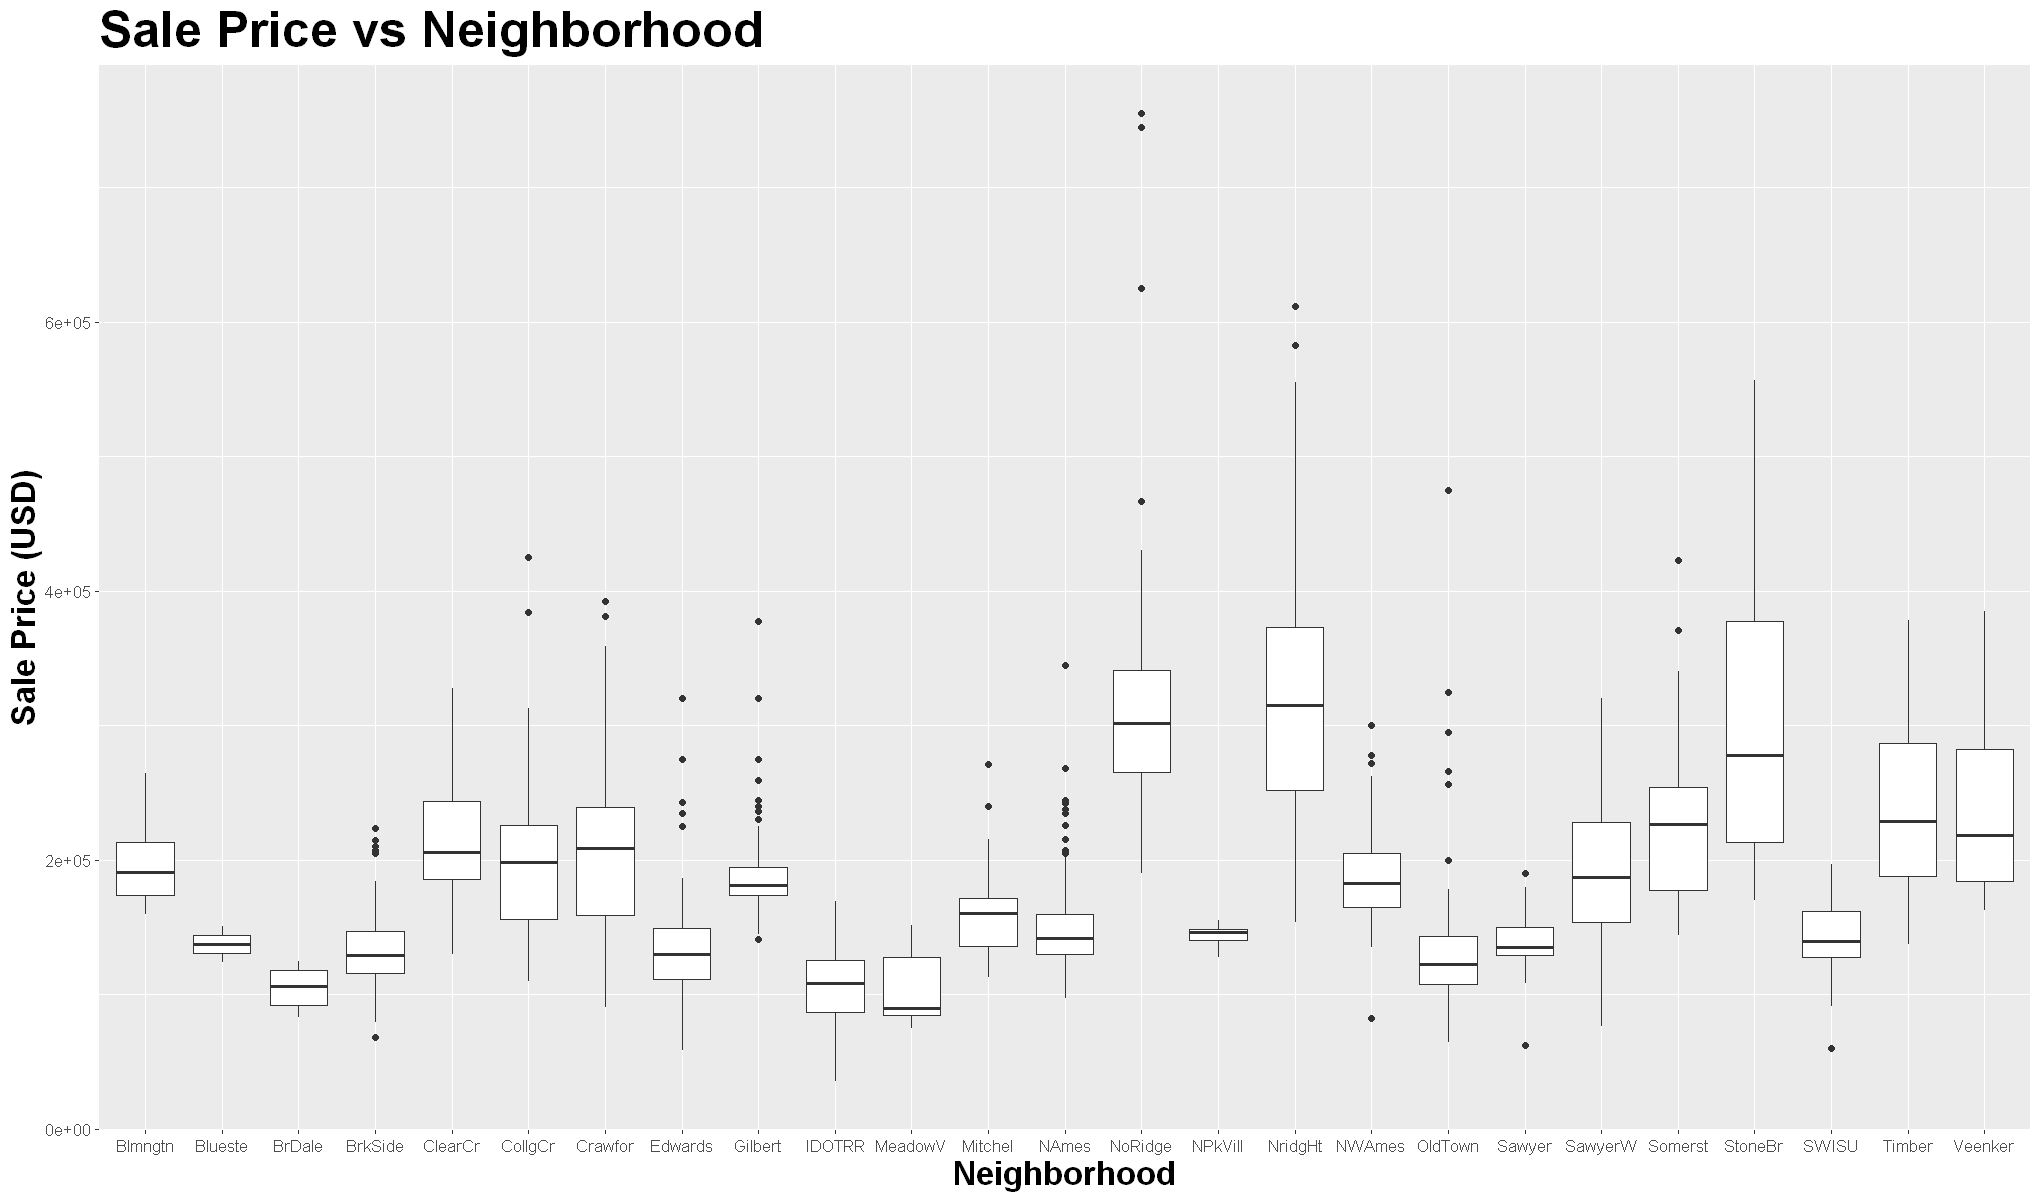

In [19]:
options(repr.plot.width = 17, repr.plot.height = 10)
neigh_plot <- ggplot(data, aes(x=Neighborhood, y=SalePrice)) +
                geom_boxplot() +
                labs(x="Neighborhood", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Neighborhood") +
                theme(axis.text=element_text(size=10),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
neigh_plot

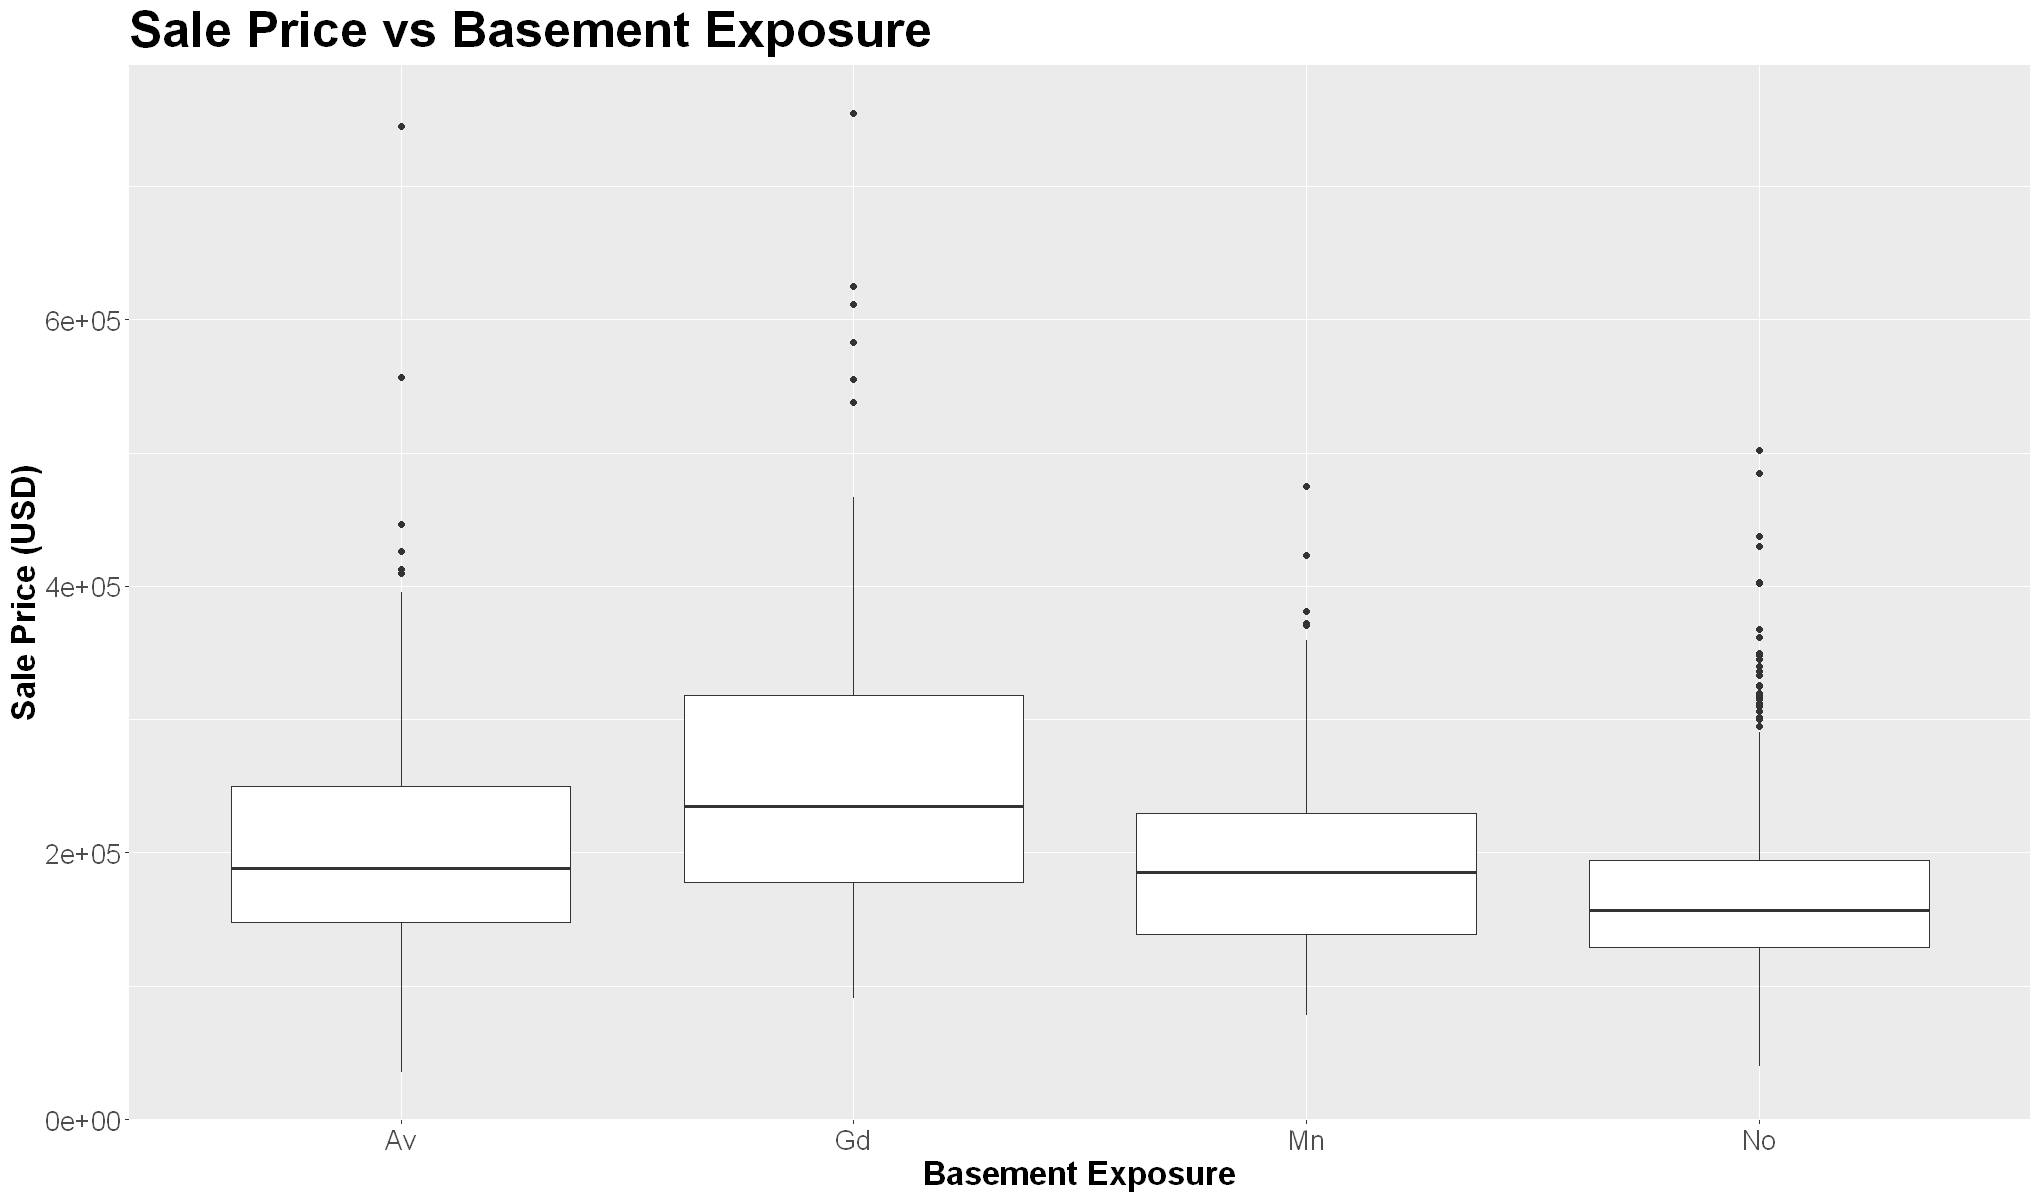

In [20]:
options(repr.plot.width = 17, repr.plot.height = 10)
be_plot <- ggplot(data, aes(x=BsmtExposure, y=SalePrice), color = Neighborhood) +
                geom_boxplot() +
                labs(x="Basement Exposure", y="Sale Price (USD)", color="Location of Crime") +
                ggtitle("Sale Price vs Basement Exposure") +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
be_plot

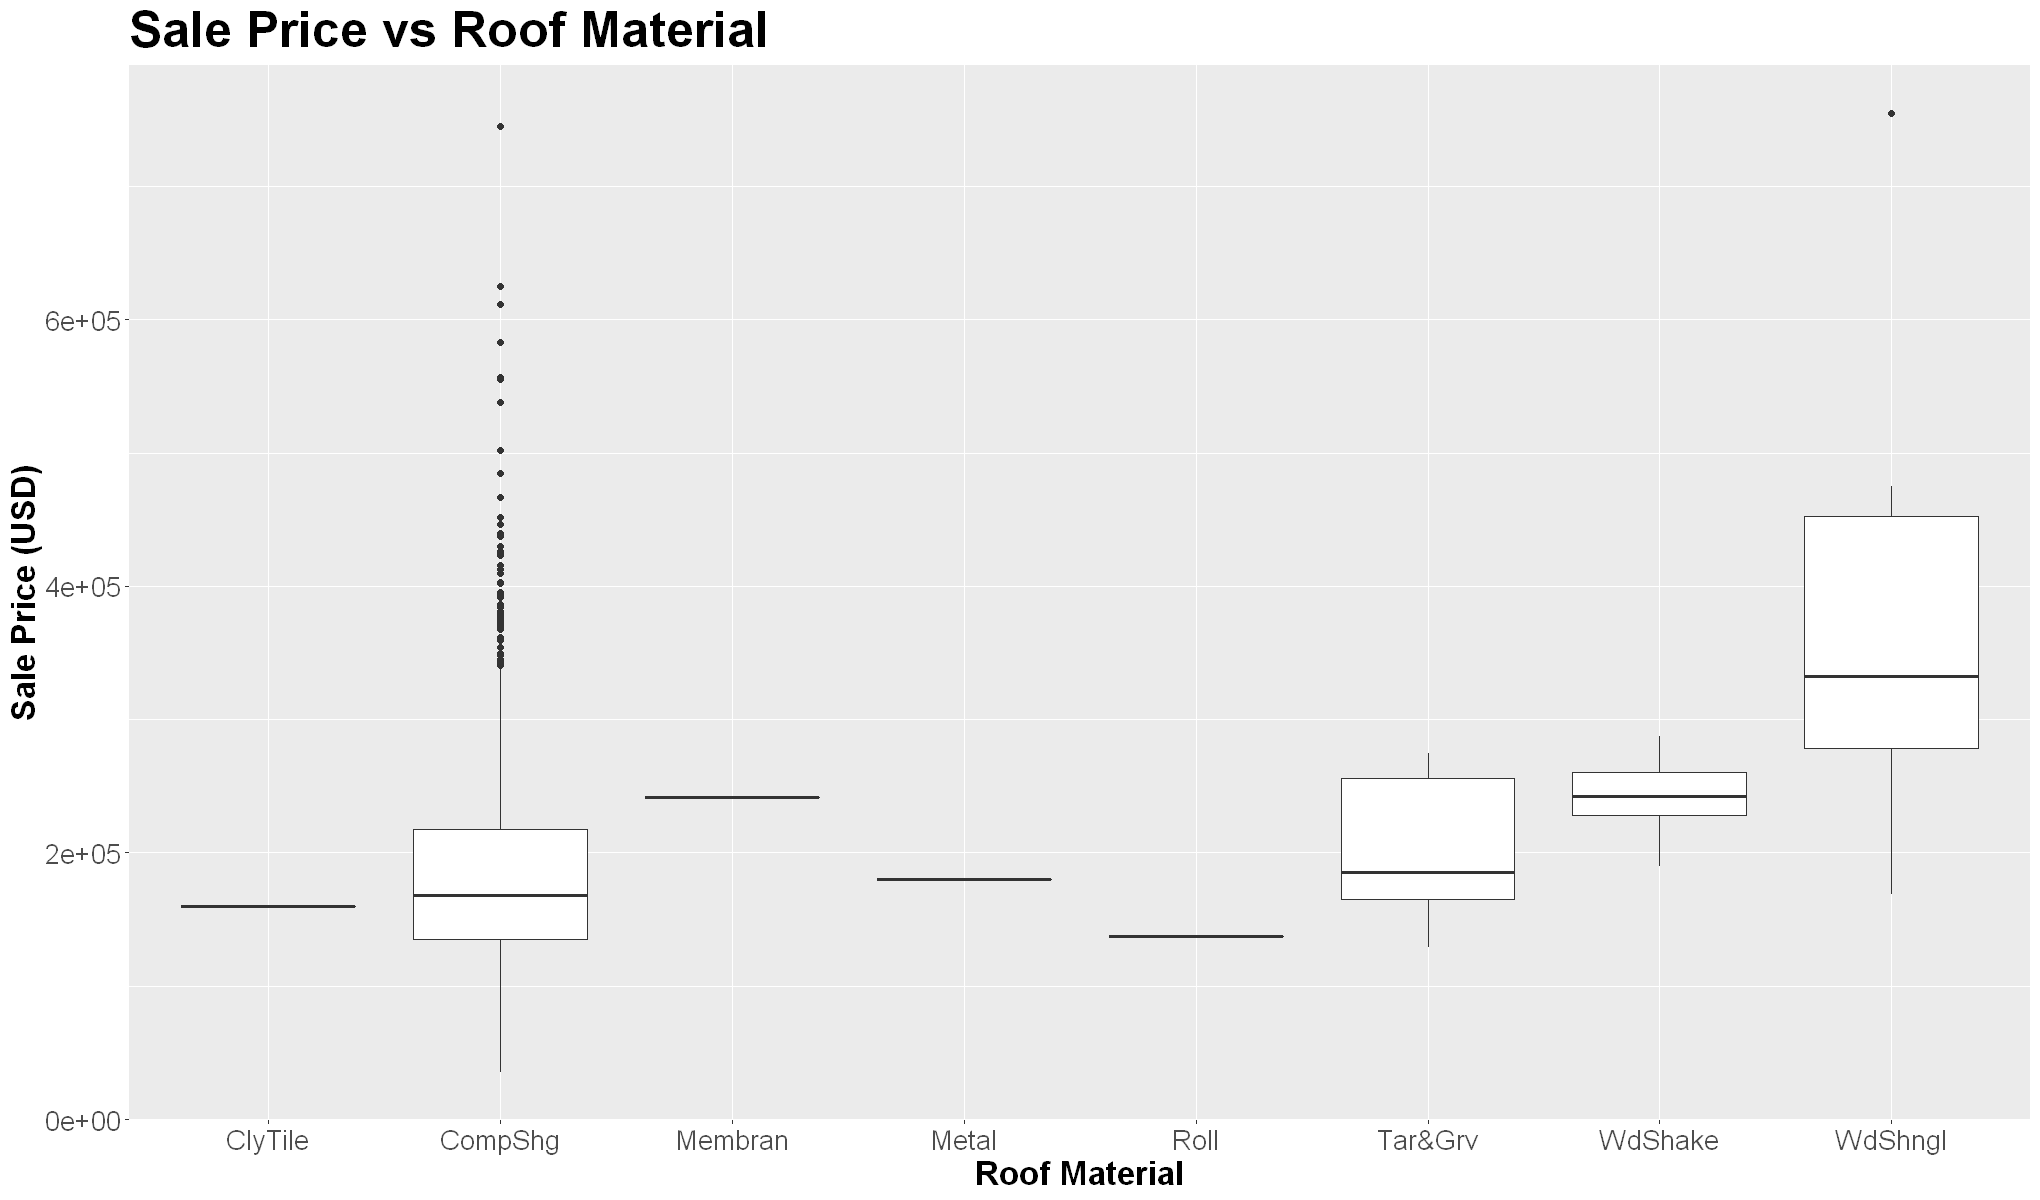

In [21]:
options(repr.plot.width = 17, repr.plot.height = 10)
rm_plot <- ggplot(data, aes(x=RoofMatl, y=SalePrice)) +
                geom_boxplot() +
                labs(x="Roof Material", y="Sale Price (USD)") +
                ggtitle("Sale Price vs Roof Material") +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
rm_plot

# Collinearity Visualization

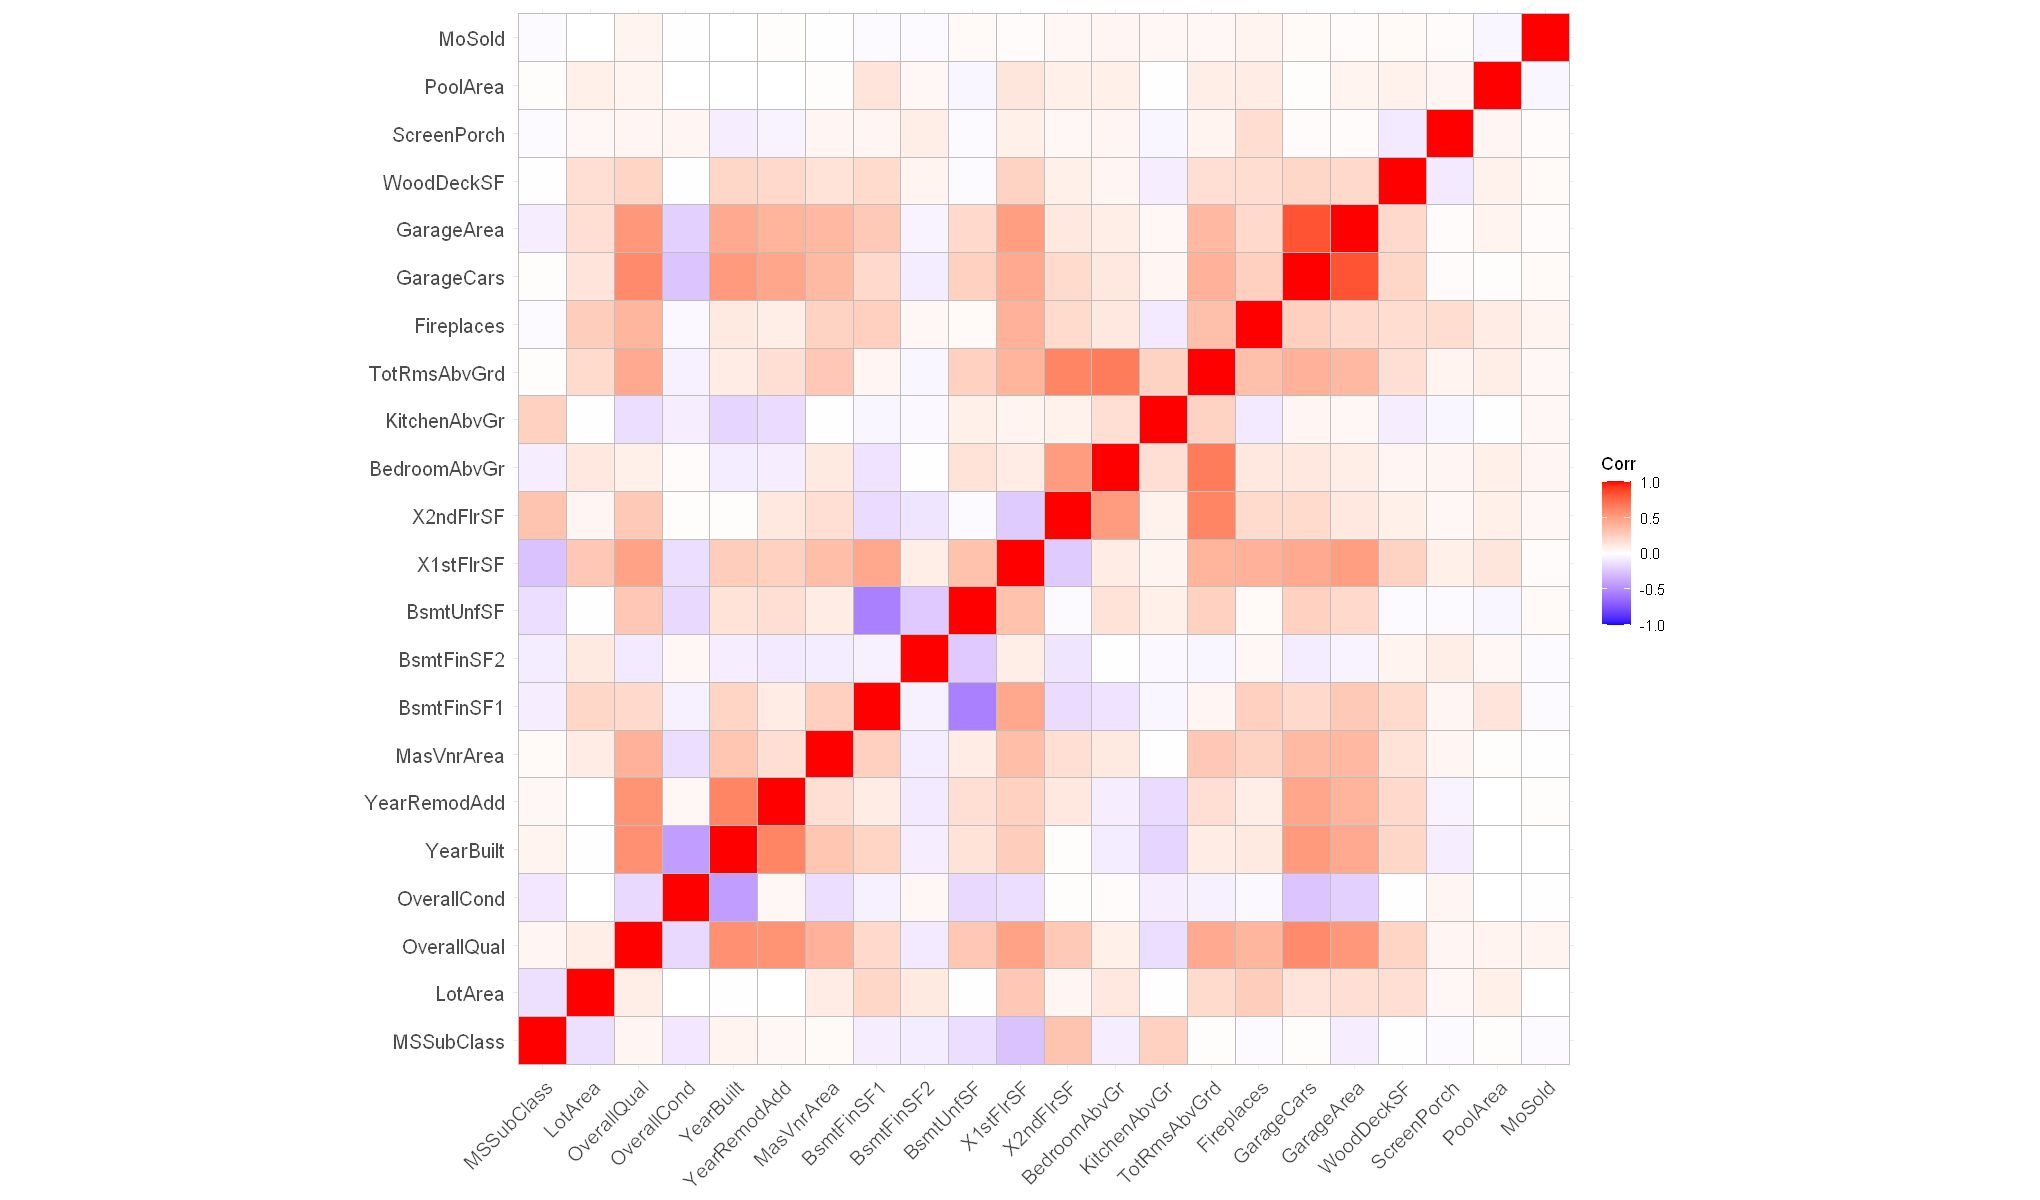

In [22]:
ourModel = select(data, c(MSSubClass , MSZoning , LotArea , 
    Street , LandContour , Utilities , LotConfig , LandSlope , 
    Neighborhood , Condition1 , Condition2 , OverallQual , OverallCond , 
    YearBuilt , YearRemodAdd , RoofStyle , RoofMatl , Exterior1st , 
    MasVnrType , MasVnrArea , ExterQual , BsmtQual , BsmtExposure , 
    BsmtFinSF1 , BsmtFinSF2 , BsmtUnfSF , X1stFlrSF , X2ndFlrSF , 
    BedroomAbvGr , KitchenAbvGr , KitchenQual , TotRmsAbvGrd , 
    Functional , Fireplaces , GarageCars , GarageArea , GarageQual , 
    GarageCond , WoodDeckSF , ScreenPorch , PoolArea , MoSold , 
    SaleType))

# select numeric variables
df <- dplyr::select_if(ourModel, is.numeric)

# calulate the correlations
r <- cor(df, use="complete.obs")

# plot correlations
ggcorrplot(r)

We add interaction terms: OverallQual : X1stFlrSF, YearBuilt : YearRemodAdd,  X1stFlrSF : X2ndFlrSF, and GarageCars : GarageArea. Did so cause of the strong correlations between them. <br>

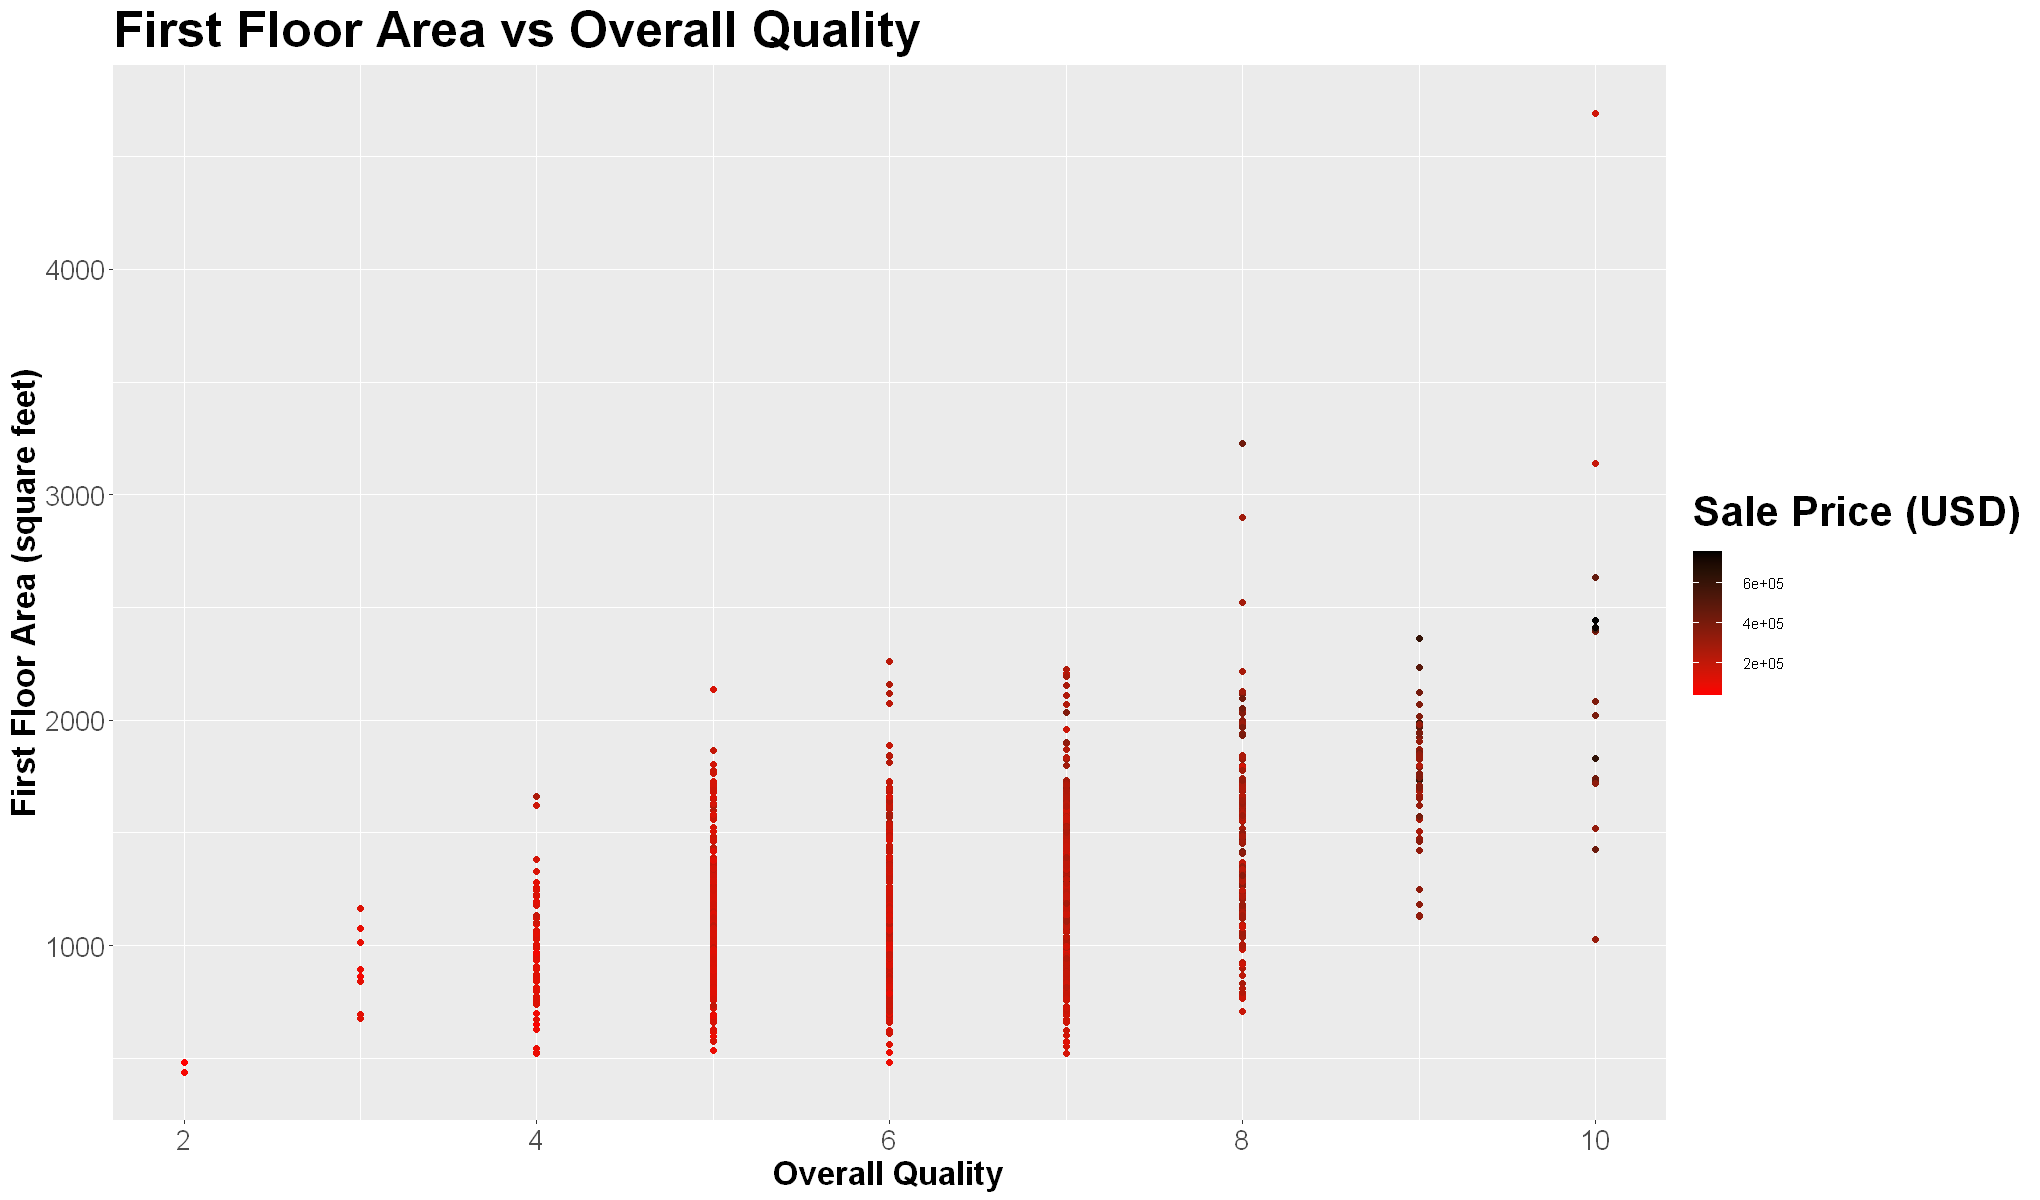

In [23]:
options(repr.plot.width = 17, repr.plot.height = 10)
oq_x1 <- ggplot(data, aes(x=OverallQual, y=X1stFlrSF, color =  SalePrice)) +
                geom_point(alpha=1) +
                labs(x="Overall Quality", y="First Floor Area (square feet)", color =  "Sale Price (USD)") +
                ggtitle("First Floor Area vs Overall Quality") +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold")) +
                scale_colour_gradient(low = "red", high = "black", na.value = NA)
                
oq_x1

Warning message:
"Removed 226 rows containing missing values (geom_point)."

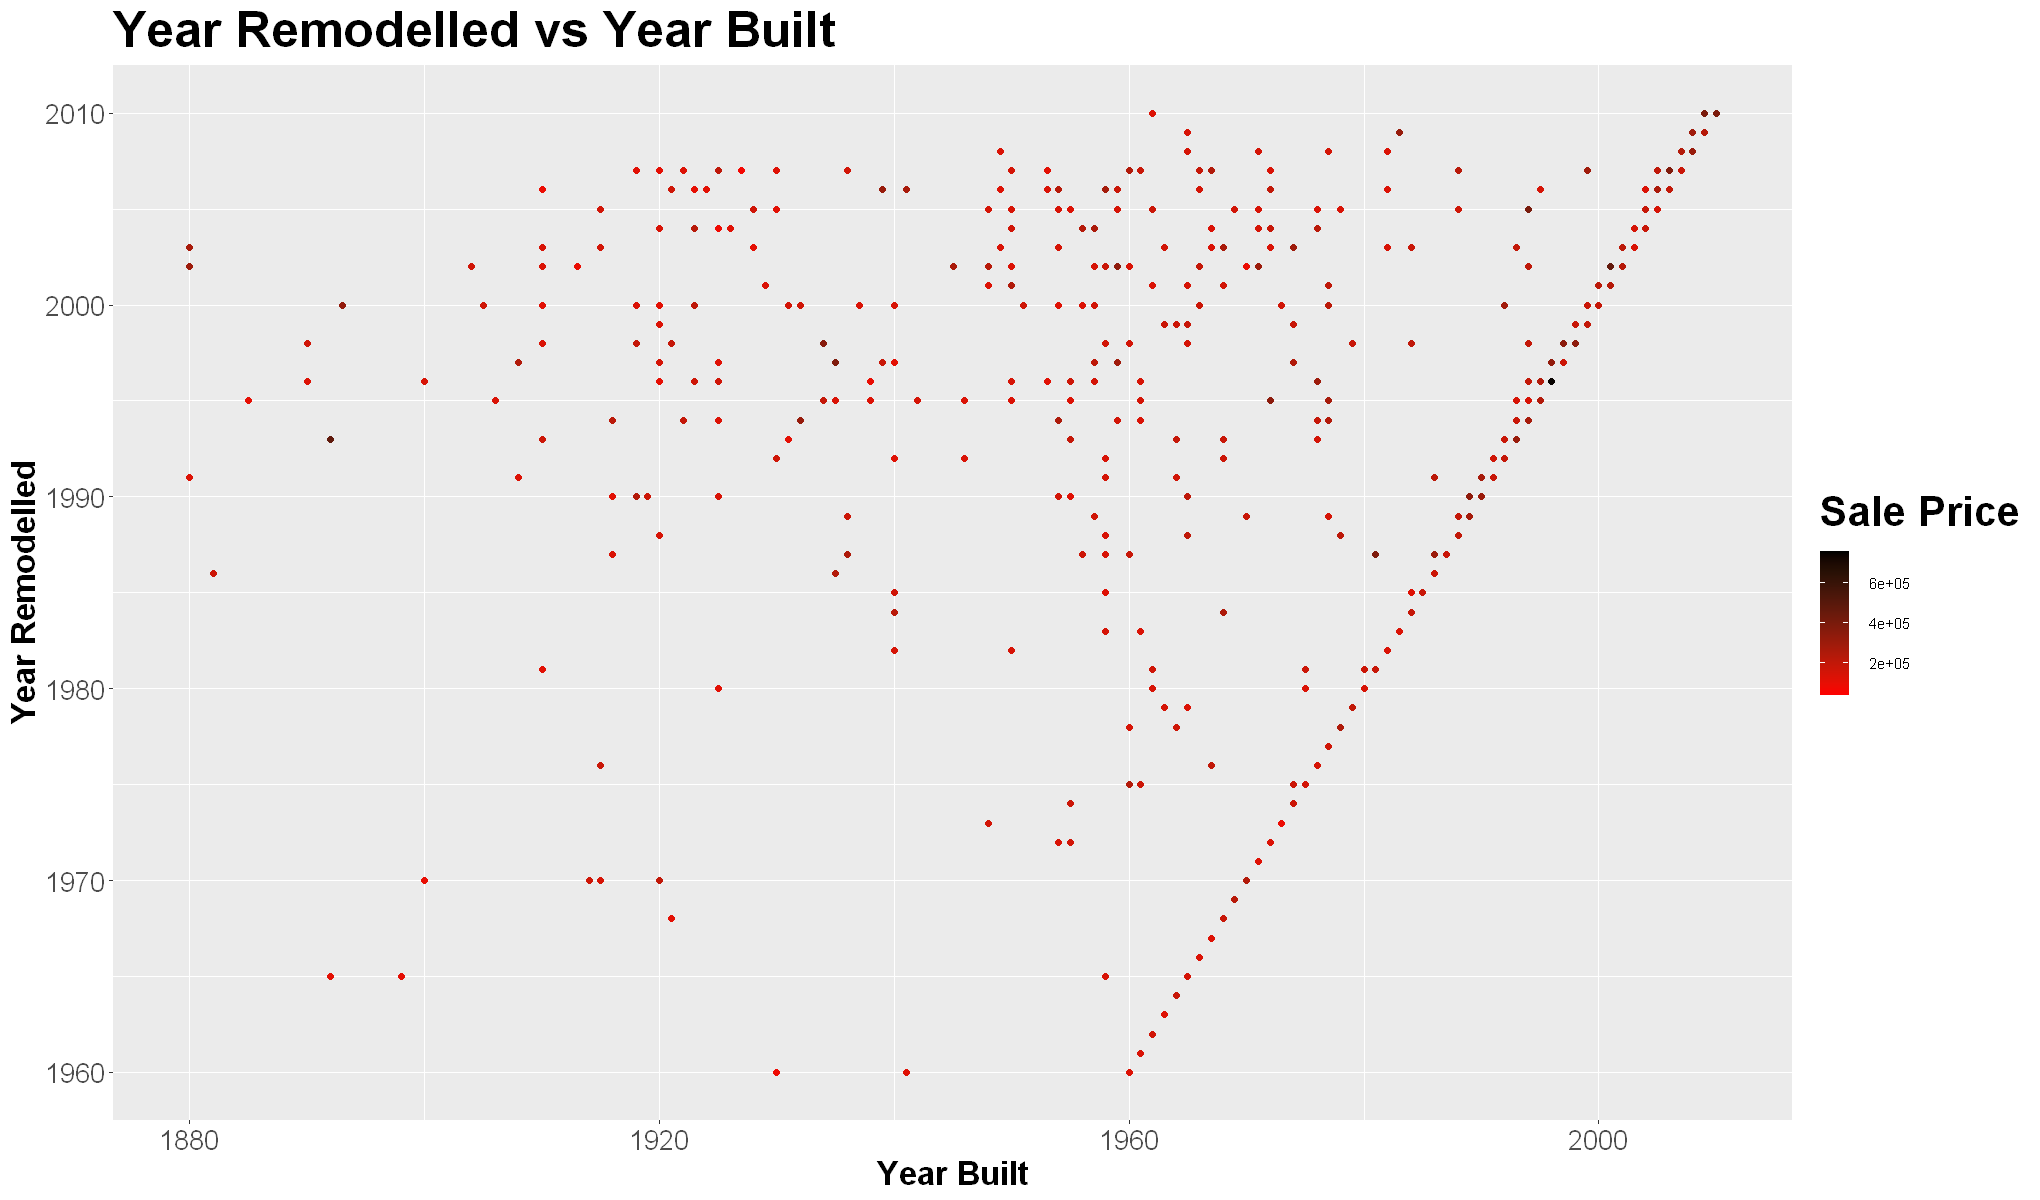

In [24]:
options(repr.plot.width = 17, repr.plot.height = 10)
yb_yr <- ggplot(data, aes(x=YearBuilt, y= YearRemodAdd, color =  SalePrice)) +
                geom_point(alpha=1) +
                labs(x="Year Built", y="Year Remodelled", color =  "Sale Price") +
                ggtitle("Year Remodelled vs Year Built") +
                ylim(1960,2010) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold")) +
                scale_colour_gradient(low = "red", high = "black", na.value = NA)
                
yb_yr

Warning message:
"Removed 755 rows containing missing values (geom_point)."

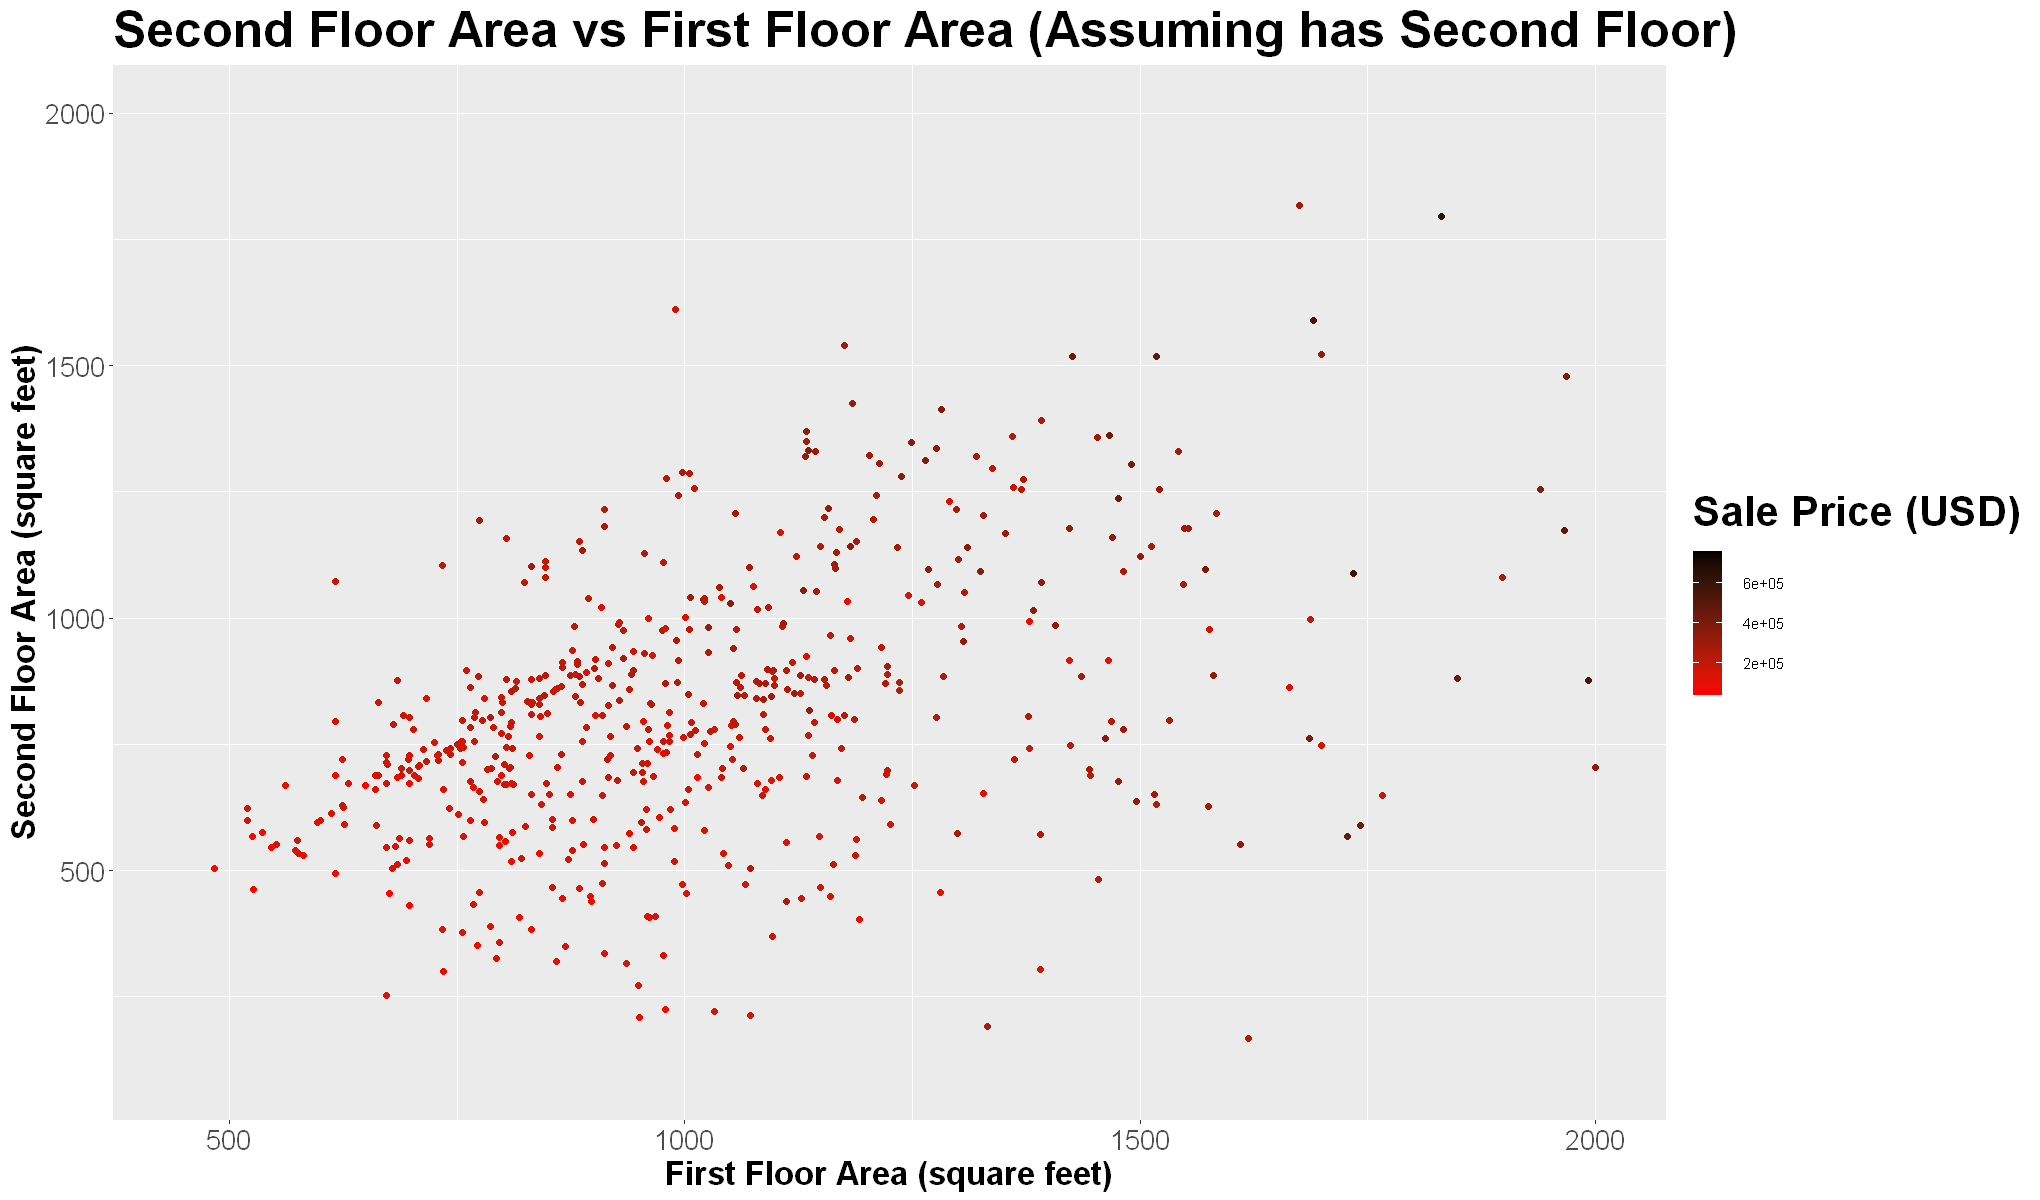

In [25]:
options(repr.plot.width = 17, repr.plot.height = 10)
ff_sf <- ggplot(data, aes(x=X1stFlrSF, y= X2ndFlrSF, color =  SalePrice)) +
                geom_point(alpha=1) +
                labs(x="First Floor Area (square feet)", y="Second Floor Area (square feet)", color =  "Sale Price (USD)") +
                ggtitle("Second Floor Area vs First Floor Area (Assuming has Second Floor)") +
                xlim(450, 2000)+
                ylim(100, 2000) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold")) +
                scale_colour_gradient(low = "red", high = "black", na.value = NA)
                
ff_sf

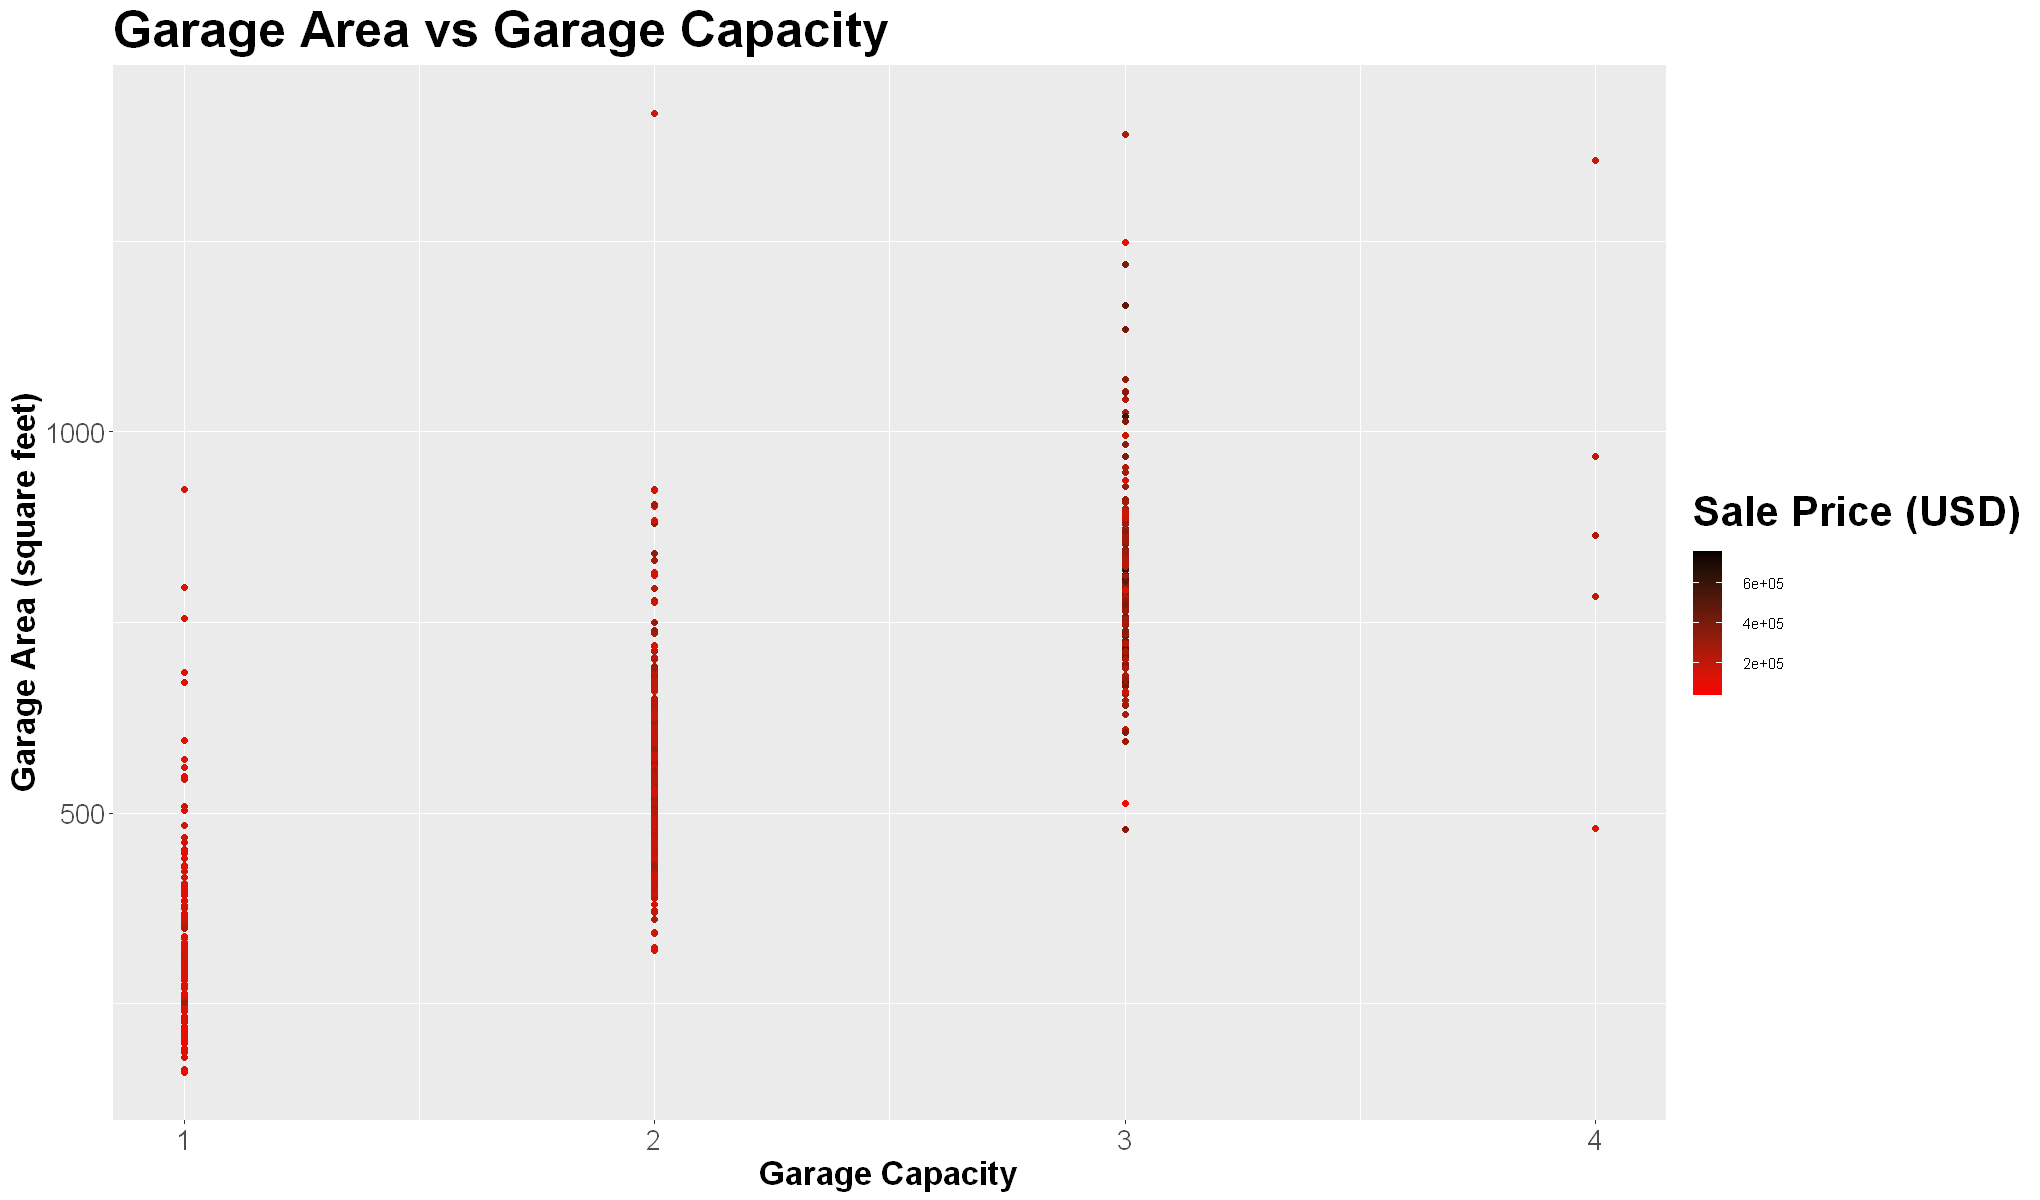

In [26]:
options(repr.plot.width = 17, repr.plot.height = 10)
ga_gc <- ggplot(data, aes(x=GarageCars, y= GarageArea, color =  SalePrice)) +
                geom_point(alpha=1) +
                labs(x="Garage Capacity", y="Garage Area (square feet)", color =  "Sale Price (USD)") +
                ggtitle("Garage Area vs Garage Capacity") +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold")) +
                scale_colour_gradient(low = "red", high = "black", na.value = NA)
                
ga_gc

# Improved Model with Interaction Terms

In [27]:
reg_inter <- lm(formula = data$SalePrice ~ MSSubClass + MSZoning + LotArea + 
    Street + LandContour + Utilities + LotConfig + LandSlope + 
    Neighborhood + Condition1 + Condition2 + OverallQual * X1stFlrSF + OverallCond + 
    YearBuilt * YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + 
    MasVnrType + MasVnrArea + ExterQual + BsmtQual + BsmtExposure + 
    BsmtUnfSF + BsmtFinSF1 + BsmtFinSF2 + X1stFlrSF * X2ndFlrSF + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + GarageCars*GarageArea + GarageQual + 
    GarageCond + WoodDeckSF + ScreenPorch + PoolArea + MoSold + 
    SaleType, data = data)
summary(reg_inter)


Call:
lm(formula = data$SalePrice ~ MSSubClass + MSZoning + LotArea + 
    Street + LandContour + Utilities + LotConfig + LandSlope + 
    Neighborhood + Condition1 + Condition2 + OverallQual * X1stFlrSF + 
    OverallCond + YearBuilt * YearRemodAdd + RoofStyle + RoofMatl + 
    Exterior1st + MasVnrType + MasVnrArea + ExterQual + BsmtQual + 
    BsmtExposure + BsmtUnfSF + BsmtFinSF1 + BsmtFinSF2 + X1stFlrSF * 
    X2ndFlrSF + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + GarageCars * GarageArea + GarageQual + 
    GarageCond + WoodDeckSF + ScreenPorch + PoolArea + MoSold + 
    SaleType, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-215986   -8927     426    8631  215986 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.093e+06  7.258e+06   0.839 0.401384    
MSSubClass             -1.318e+02  2.431e+01  -5.421 7.16e-08 ***
MSZoningFV              5.697e+04  1.200